In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def plot_permutation(P):
    n = len(P)
    x_values = [i for i in range(n)]
    y_values = P
    plt.scatter(x_values,y_values, label = str(P))

In [3]:
def unrank_permutation(n_list,d):
    n = len(n_list)
    nn_list = [h for h in n_list]
    if d == 0:
        return nn_list
    for k in range(n):
        if d < (k+1)*np.math.factorial(n-1):
            nn_list.remove(n_list[k])
            return [n_list[k]] + unrank_permutation(nn_list,d - k*np.math.factorial(n-1)) 

In [4]:
def count_62458173(permutation):
    P = permutation
    n = len(P)
    C = 0
    for a in range(n-7):
        for b in range(a+1,n-6):
            if P[a]>P[b]:
                for c in range(b+1,n-5):
                    if P[c] > P[b] and P[c] < P[a]:
                        for d in range(c+1,n-4):
                            if P[d] > P[c] and P[d] < P[a]:
                                for e in range(d+1,n-3):
                                    if P[e] > P[a]:
                                        for f in range(e+1,n-2):
                                            if P[f] <P[b]:
                                                for g in range(f+1,n-1):
                                                    if P[g] > P[a] and P[g] < P[e]:
                                                        for h in range(g+1,n):
                                                            if P[h] <P[c] and P[h] > P[b]:
                                                                C = C+1
        return C

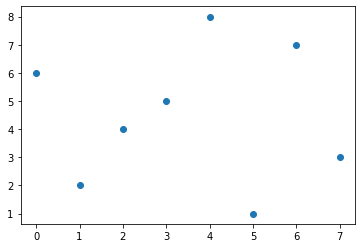

In [23]:
plot_permutation([6,2,4,5,8,1,7,3])

In [20]:
def count_24153(permutation):
    P = permutation
    n = len(P)
    C = 0
    for i in range(n-4):
        for j in range(i+1,n-3):
            if P[i] < P[j]:
                for k in range(j+1,n-2):
                    if P[k] < P[i]:
                        for l in range(k+1,n-1):
                            if P[l] > P[j]:
                                for h in range(l+1,n):
                                    if P[h]>P[i] and P[h]<P[j]:
                                        C = C+1
    return C

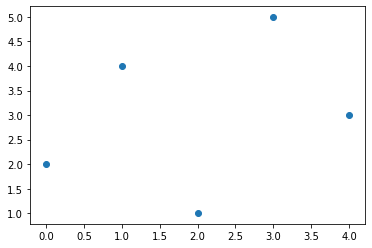

In [22]:
plot_permutation([2,4,1,5,3])

In [37]:
def count_25314(permutation):
    P = permutation
    n = len(P)
    C = 0
    for i in range(n-4):
        for j in range(i+1,n-3):
            if P[i] < P[j]:
                for k in range(j+1,n-2):
                    if P[k] > P[i] and P[k] < P[j]:
                        for l in range(k+1,n-1):
                            if P[l] < P[i]:
                                for h in range(l+1,n):
                                    if P[h]>P[k] and P[h]<P[j]:
                                        C = C+1
    return C

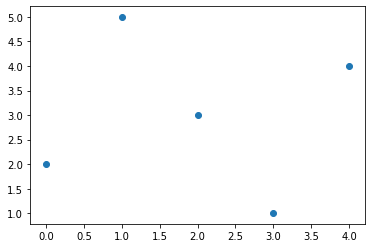

In [38]:
plot_permutation([2,5,3,1,4])

In [5]:
def relative_order(p):
    '''takes a list of n distinct integers and returns the permutation from 0 to n-1 with the same relative order.'''
    n = len(p)
    SP = sorted(p)
    output = [0]*n
    for i in range(n):
        ind = SP.index(p[i])
        output[i] = ind
    return output

In [6]:
def crossover1(P1,P2):
    n = len(P1)
    offspring = [-1]*n
    r = random.random()
    if r < 0.5:
        offspring[0] = P1[0]
    else:
        offspring[0] = P2[0]
    for i in range(1,n):
        r = random.random()
        if r < 0.5:
            j = i
            while P1[j] in offspring:
                j = (j+1) % n
            offspring[i] = P1[j]
        else:
            j = i
            while P2[j] in offspring:
                j = (j+1) % n
            offspring[i] = P2[j]
    return offspring

In [7]:
crossover1([0,1,2,3,4,5],[5,4,3,2,1,0])

[5, 1, 2, 0, 4, 3]

In [8]:
def crossover2(P1,P2):
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    j = r
    while j < n:
        for k in range(n):
            if P2[k] not in child1:
                child1[j] = P2[k]
                j=j+1
    j = r
    while j < n:
        for k in range(n):
            if P1[k] not in child2:
                child2[j] = P1[k]
                j = j+1
    return [child1,child2]

In [9]:
def crossover3(P1,P2):
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    RO1 = relative_order(P1[r:])
    RO2 = relative_order(P2[r:])
    k = 0
    for i in range(n):
        if i not in child1:
            child1[r+RO2.index(k)] = i
            k = k+1
    k=0
    for i in range(n):
        if i not in child2:
            child2[r+RO1.index(k)] = i
            k = k+1
    return [child1,child2]

In [10]:
def mut1(Perm,r1,r2):
    n = len(Perm)
    output = [i for i in Perm]
    if r1 == r2:
        return(Perm)
    output[r1+1]=Perm[r2]
    for i in range(r1+2,r2+1):
        output[i] = Perm[i-1]
    return output

def mutation1(Perm):
    n = len(Perm)
    r1 = random.randint(0,n-1)
    r2 = random.randint(0,n-1)
    if r1<=r2:
        return mut1(Perm,r1,r2)
    else:
        REV = [Perm[n-1-j] for j in range(n)]
        output = mut1(REV,r2,r1)
        return [output[n-1-j] for j in range(n)]

In [11]:
#CROSSOVER3


In [12]:
#CROSSOVER1


In [15]:
def Evolutionary_Algorithm2_62458173(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(2000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_62458173(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<20001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,75)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover2(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_62458173(child1)
        fitness2 = count_62458173(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:2000]
        if fe % 1000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

In [24]:
def Evolutionary_Algorithm2_24153(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(15000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_24153(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,60)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover2(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_24153(child1)
        fitness2 = count_24153(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:15000]
        if fe % 5000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

In [35]:
def Evolutionary_Algorithm2_24153_POP(n,population):
    #initialize population and compute fitness for each individual
    POP = population
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,60)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover2(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_24153(child1)
        fitness2 = count_24153(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:8000]
        if fe % 10000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

[1000] [6323753, 6189148, 6189148, 6109574, 6037486, 6018687, 6002874, 5843101, 5791936, 5606826] [174657]


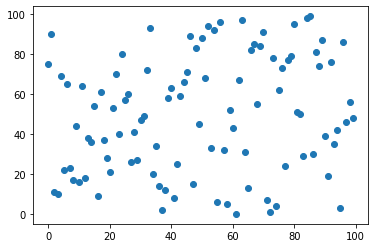

[2000] [16321583, 14814208, 14448587, 14279277, 14277267, 14240000, 14048538, 14015491, 13981631, 13863930] [1143047]


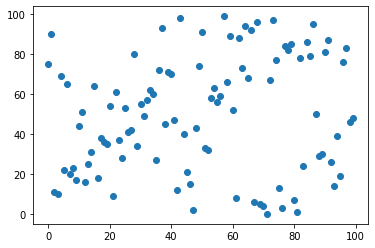

[3000] [27655070, 27402985, 27294409, 27257594, 27059936, 27006538, 26989426, 26752895, 26747900, 26570353] [4081175]


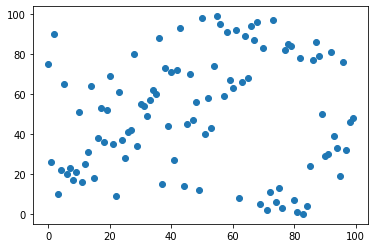

[4000] [36900578, 36664082, 35738393, 35551146, 35454835, 35320691, 35041768, 35039937, 35017832, 34972190] [10322904]


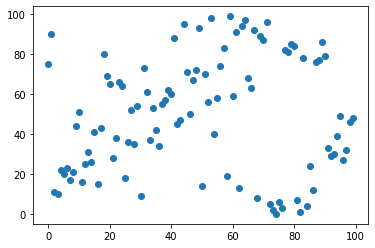

[5000] [51963578, 49334260, 48173308, 46778599, 46764016, 46069141, 46051337, 45867883, 45714048, 45305670] [19228506]


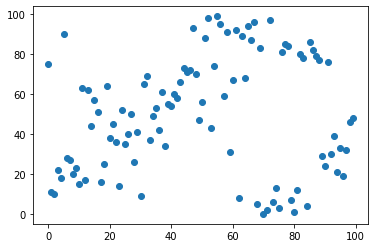

[6000] [59078870, 58818603, 58800004, 58768779, 57675064, 57562911, 57280649, 57048960, 56985690, 56614483] [27796511]


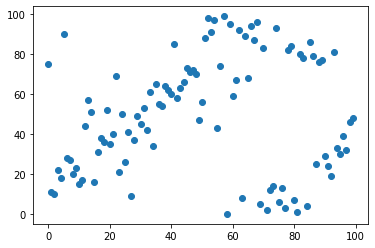

[7000] [71749106, 69279036, 68767347, 68699003, 68256088, 67847010, 67391399, 67274274, 67123668, 67116572] [36637140]


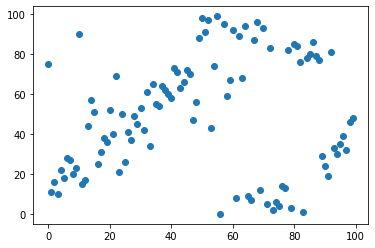

[8000] [81311786, 80814153, 80814153, 79984373, 79458698, 77258878, 77258878, 77089788, 77068153, 76926305] [45767595]


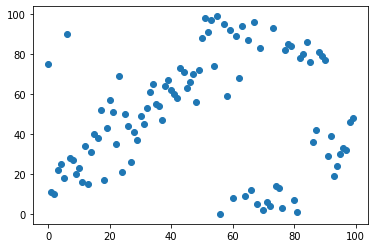

[9000] [94015798, 92694026, 92539253, 91817688, 91780159, 91340964, 90973222, 90973222, 90826225, 90757697] [56063532]


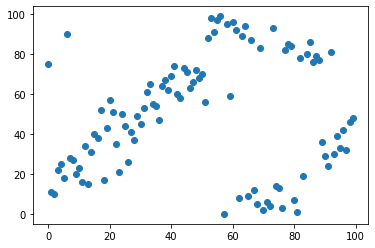

[10000] [103553347, 102890646, 102187830, 101013337, 100343384, 99990649, 99920751, 98965058, 98647079, 98122630] [65310461]


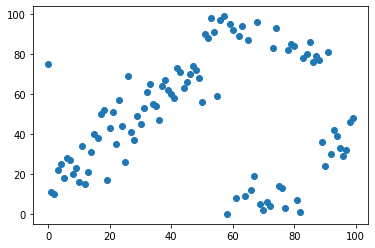

[11000] [115125717, 110802601, 110802601, 110802601, 110802601, 110802601, 110802601, 110802601, 110802601, 110802601] [74449298]


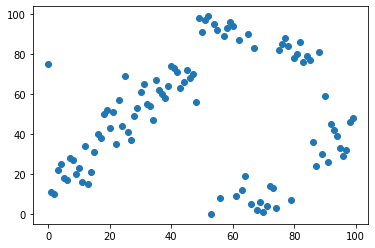

[12000] [124129710, 117936939, 117540012, 117415551, 116513015, 116406258, 116065364, 115981417, 115457453, 115125717] [83869176]


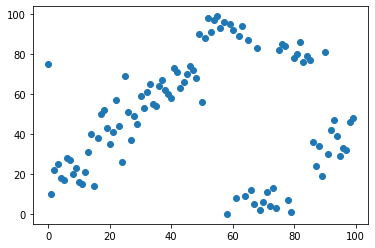

[13000] [124696787, 124129710, 124129710, 123176017, 123001065, 121389533, 121389533, 120853919, 120520986, 120420134] [90757697]


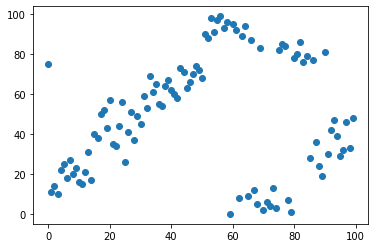

[14000] [132331054, 128153848, 127949336, 127542719, 127066865, 126908710, 126658604, 126306900, 126278875, 126078543] [97675978]


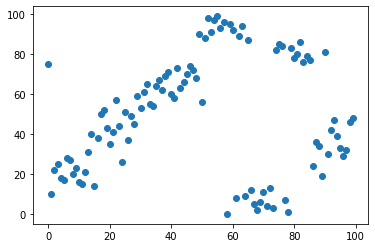

[15000] [134527783, 133761128, 133761128, 133252341, 132423679, 132331054, 132331054, 132331054, 132331054, 132331054] [104517671]


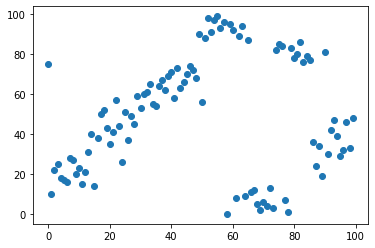

[16000] [138795273, 136087468, 135824114, 135796909, 135627813, 135597399, 135190507, 134906812, 134906812, 134608334] [110055025]


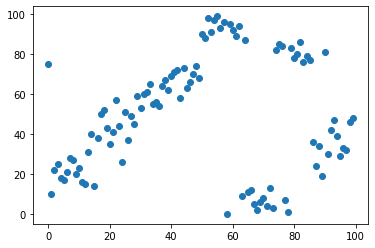

[17000] [143826028, 143596990, 143596990, 143049621, 142136528, 142136528, 142047370, 142047370, 141991384, 141991384] [115301529]


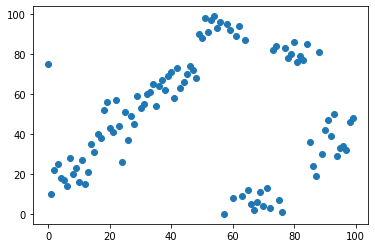

[18000] [146892041, 146524506, 146524506, 146524506, 145796750, 145426806, 144903636, 144805632, 144419866, 144322487] [120770402]


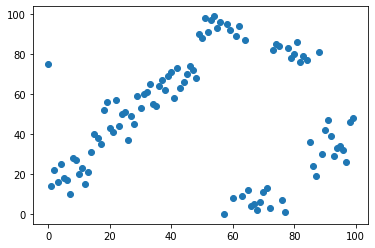

[19000] [150644763, 150540144, 150540144, 150069274, 149968094, 149813103, 149540315, 149456012, 149456012, 149313444] [125922294]


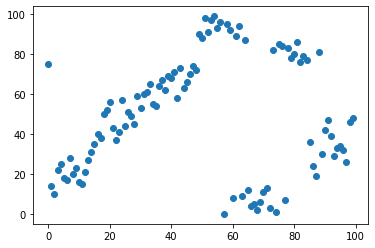

[20000] [154092776, 153638804, 152557434, 152456288, 152358586, 152225284, 152225284, 152181858, 152181858, 152046382] [130599924]


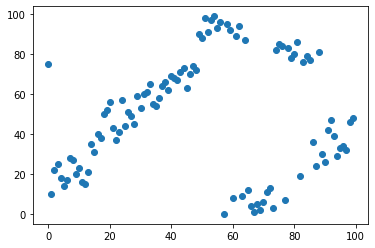

In [16]:
EA75 = Evolutionary_Algorithm2_62458173(100)

[5000] [1690507, 1674396, 1672196, 1664329, 1652710, 1648526, 1648526, 1642195, 1633176, 1624077] [657942]


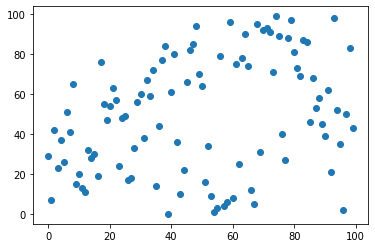

[10000] [2204361, 2191604, 2191604, 2190676, 2169136, 2169095, 2158587, 2157229, 2152429, 2147477] [1052948]


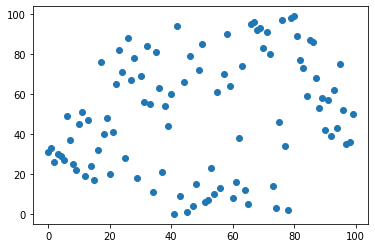

[15000] [2397453, 2368763, 2368763, 2357886, 2351104, 2348043, 2345820, 2338701, 2338057, 2335517] [1595956]


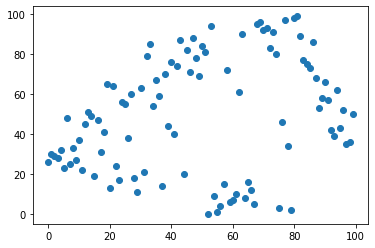

[20000] [2636212, 2586902, 2584515, 2580230, 2578733, 2577321, 2576387, 2575394, 2573472, 2573378] [1947844]


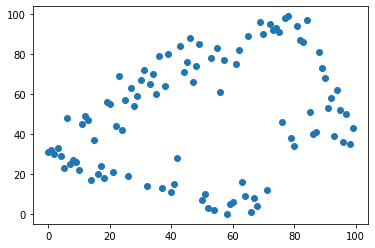

[25000] [2781281, 2761378, 2739436, 2737949, 2733998, 2726814, 2723236, 2717002, 2716107, 2713268] [2154941]


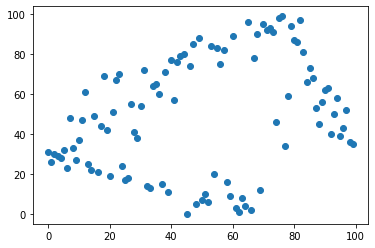

[30000] [2899468, 2876384, 2866320, 2862013, 2847964, 2846207, 2843795, 2840283, 2839470, 2839158] [2328353]


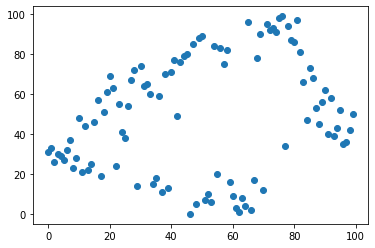

[35000] [3022602, 3016240, 2996616, 2991954, 2983788, 2979211, 2977516, 2970662, 2970560, 2969984] [2507418]


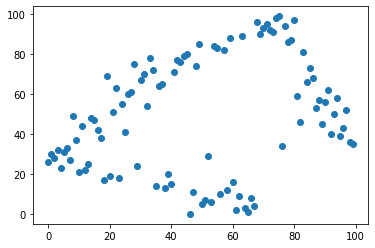

[40000] [3120938, 3108958, 3107365, 3105386, 3104995, 3102806, 3099536, 3098883, 3098883, 3096986] [2657446]


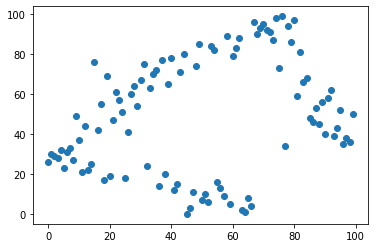

[45000] [3176064, 3160972, 3160958, 3153269, 3151176, 3151176, 3148203, 3147546, 3147231, 3147216] [2790953]


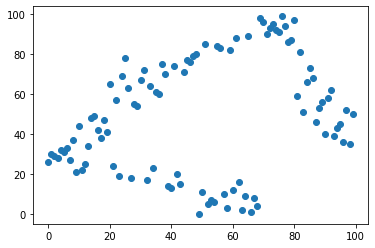

[50000] [3222432, 3221617, 3220833, 3220833, 3220813, 3216824, 3210794, 3206673, 3200048, 3196983] [2890529]


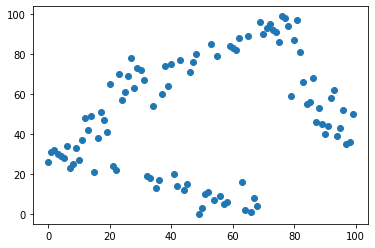

[55000] [3274200, 3263314, 3253297, 3250117, 3249640, 3249640, 3248931, 3248931, 3235128, 3228396] [2963171]


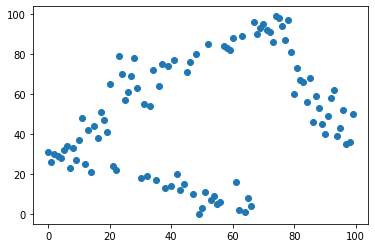

[60000] [3310130, 3309406, 3286495, 3286495, 3285934, 3285246, 3284126, 3281260, 3279446, 3279446] [3018594]


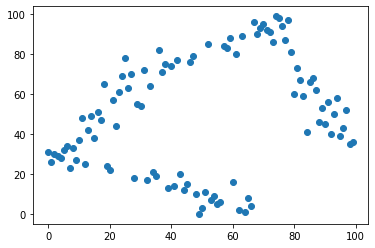

[65000] [3354395, 3331057, 3331057, 3328622, 3327699, 3324898, 3322654, 3322190, 3322189, 3319516] [3067292]


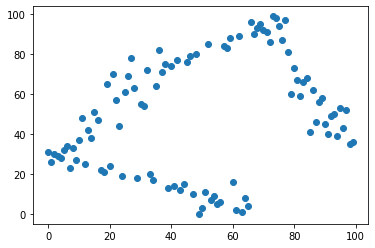

[70000] [3374724, 3367447, 3366978, 3363973, 3363973, 3363047, 3363029, 3363028, 3359656, 3358704] [3120963]


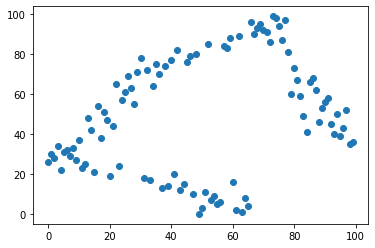

[75000] [3411837, 3399859, 3399859, 3395965, 3395300, 3394460, 3393323, 3393023, 3393023, 3390624] [3176280]


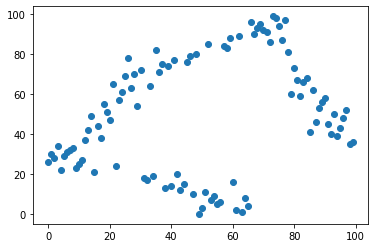

[80000] [3444141, 3444125, 3435141, 3423489, 3422090, 3420081, 3419789, 3419789, 3419789, 3419787] [3223441]


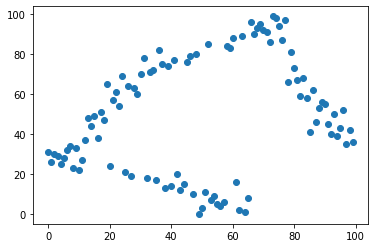

[85000] [3459194, 3449932, 3449932, 3445076, 3444141, 3444141, 3444125, 3444125, 3444125, 3441923] [3268293]


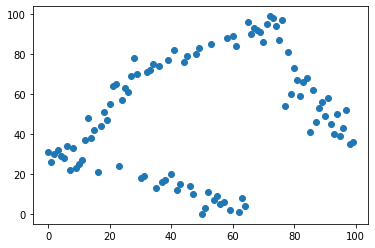

[90000] [3483853, 3473199, 3472526, 3468674, 3467650, 3466561, 3466126, 3465964, 3465704, 3464710] [3303882]


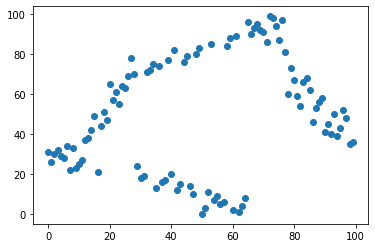

[95000] [3492733, 3492733, 3492684, 3490951, 3490951, 3490904, 3490108, 3489946, 3489092, 3488590] [3335838]


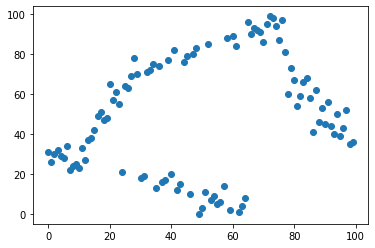

[100000] [3526483, 3513298, 3512476, 3509411, 3507788, 3506944, 3505383, 3501641, 3501641, 3501634] [3363240]


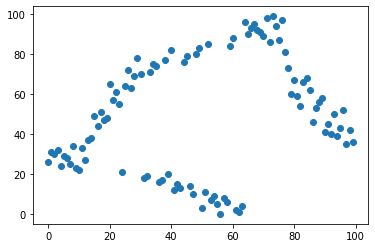

[105000] [3530476, 3526483, 3525407, 3525407, 3525399, 3525399, 3525399, 3525393, 3524088, 3524074] [3389854]


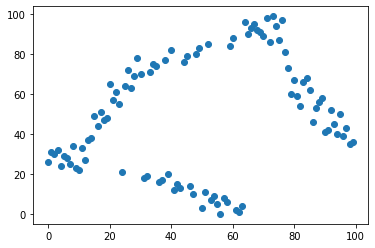

[110000] [3539137, 3536915, 3530476, 3530476, 3530476, 3530476, 3530460, 3528732, 3528573, 3528456] [3415580]


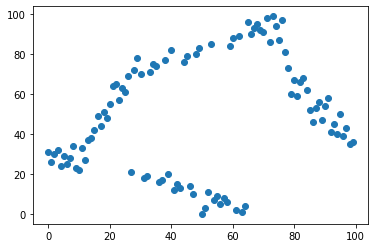

[115000] [3541258, 3541049, 3539824, 3539137, 3539005, 3539005, 3538922, 3538749, 3538740, 3538518] [3438311]


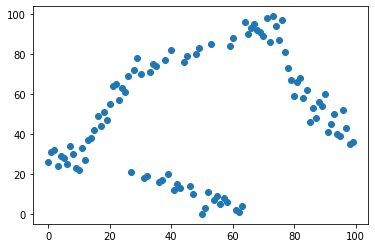

[120000] [3544747, 3544733, 3544723, 3544723, 3544544, 3544538, 3544473, 3544380, 3544380, 3544380] [3458061]


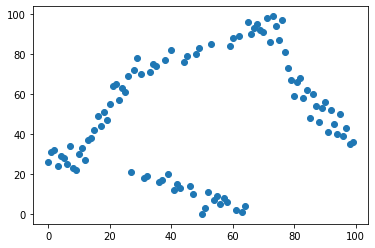

[125000] [3553658, 3552357, 3552241, 3552192, 3552192, 3552192, 3552192, 3552186, 3552186, 3552129] [3473294]


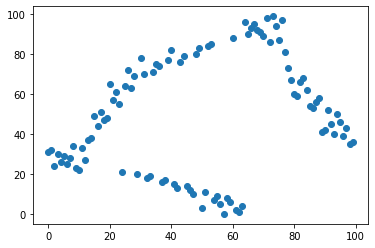

[130000] [3564620, 3563051, 3562426, 3562426, 3562420, 3562419, 3562054, 3561780, 3561780, 3561355] [3488771]


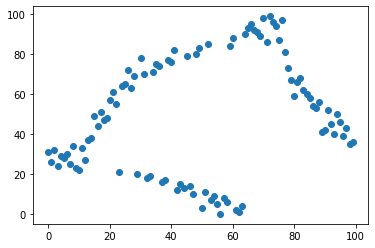

[135000] [3570973, 3570533, 3569977, 3567991, 3567519, 3567519, 3567519, 3567513, 3567465, 3567228] [3503478]


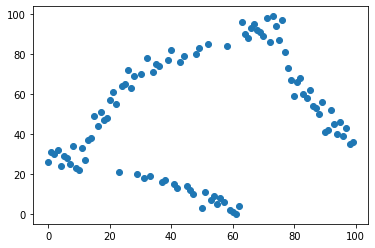

[140000] [3575959, 3575657, 3575633, 3575348, 3574442, 3574232, 3574232, 3574072, 3573819, 3573315] [3514806]


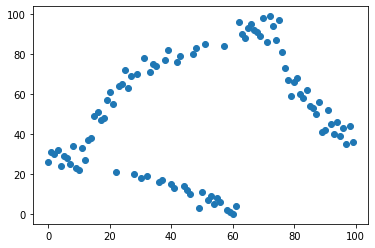

[145000] [3584080, 3582396, 3582396, 3582148, 3582135, 3581685, 3581603, 3581533, 3580489, 3580397] [3528709]


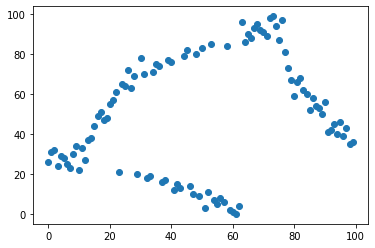

[150000] [3589554, 3588965, 3588965, 3587752, 3587752, 3587752, 3587749, 3587291, 3586940, 3586492] [3538233]


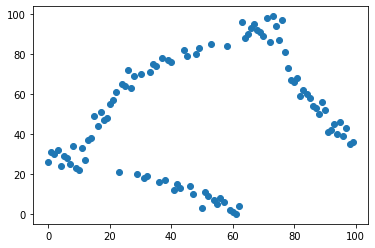

[155000] [3595788, 3594968, 3594469, 3593929, 3593929, 3593929, 3593929, 3593929, 3593929, 3593921] [3546697]


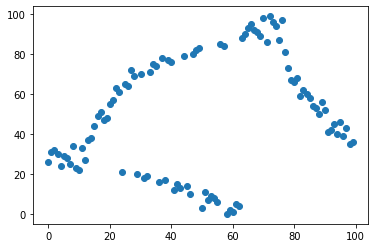

[160000] [3599727, 3599727, 3599221, 3599096, 3599096, 3598636, 3598630, 3598568, 3598386, 3598149] [3554262]


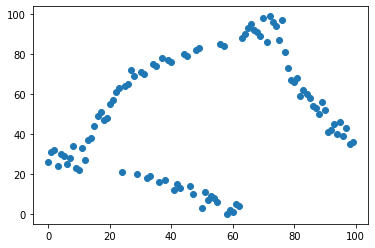

[165000] [3603183, 3602670, 3602656, 3602655, 3602637, 3602064, 3602064, 3601917, 3601698, 3601454] [3562869]


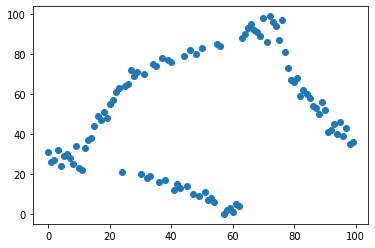

[170000] [3604750, 3604747, 3604613, 3604613, 3604607, 3604185, 3604185, 3604179, 3604155, 3604026] [3569288]


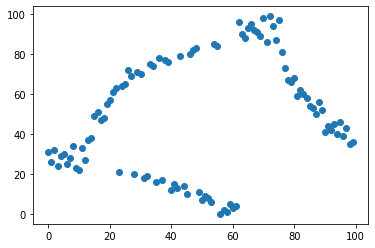

[175000] [3608015, 3606596, 3606590, 3606590, 3606566, 3606439, 3606262, 3606144, 3605640, 3605640] [3574240]


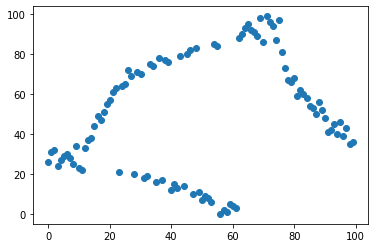

[180000] [3608015, 3608015, 3608015, 3607867, 3607786, 3607732, 3607732, 3607118, 3607094, 3607050] [3579425]


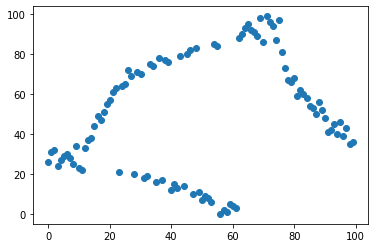

[185000] [3608848, 3608476, 3608045, 3608045, 3608015, 3608015, 3608015, 3608015, 3608015, 3608015] [3583832]


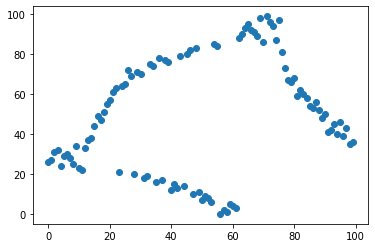

[190000] [3612500, 3611923, 3610213, 3609383, 3609285, 3609255, 3609200, 3609200, 3609102, 3609102] [3587842]


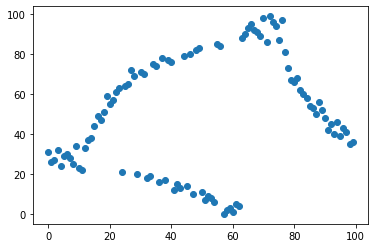

[195000] [3614858, 3614147, 3613951, 3613946, 3613946, 3613944, 3613930, 3613930, 3613912, 3613900] [3592205]


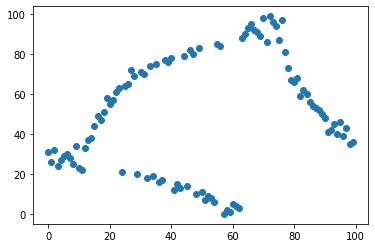

[200000] [3615626, 3615626, 3615477, 3615477, 3615472, 3615451, 3615428, 3615395, 3615134, 3615134] [3595081]


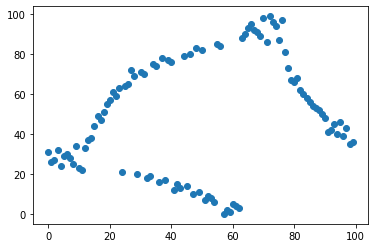

In [25]:
EA100 = Evolutionary_Algorithm2_24153(100)

[5000] [3617081, 3616435, 3616425, 3616423, 3616422, 3616401, 3616285, 3616285, 3616285, 3616285] [3598114]


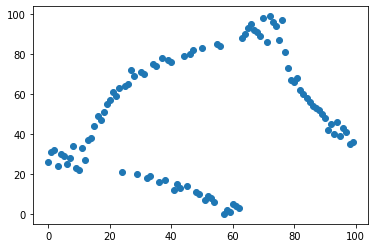

[10000] [3618473, 3618119, 3617814, 3617540, 3617518, 3617517, 3617411, 3617411, 3617411, 3617381] [3600467]


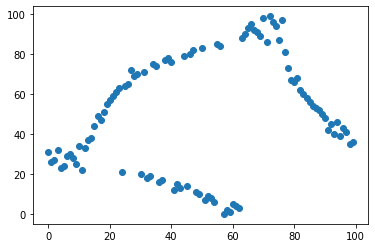

[15000] [3618833, 3618833, 3618833, 3618833, 3618833, 3618833, 3618833, 3618833, 3618833, 3618833] [3602665]


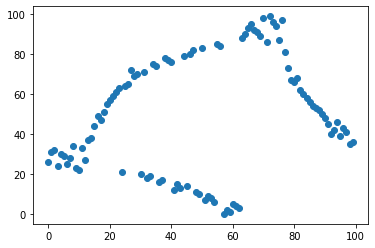

[20000] [3619525, 3619503, 3619503, 3619503, 3619503, 3619503, 3619503, 3619503, 3619503, 3619503] [3604056]


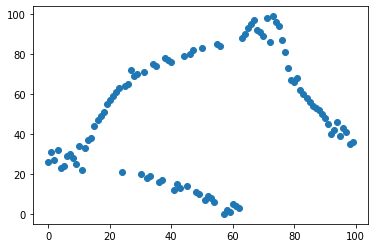

[25000] [3620253, 3620253, 3620240, 3620240, 3620240, 3620229, 3620229, 3620229, 3620179, 3620175] [3605879]


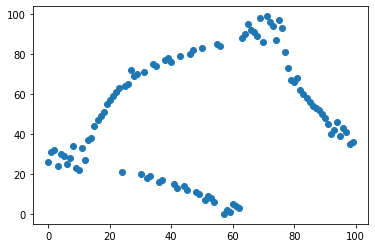

[30000] [3620760, 3620730, 3620719, 3620714, 3620714, 3620708, 3620708, 3620708, 3620708, 3620672] [3608015]


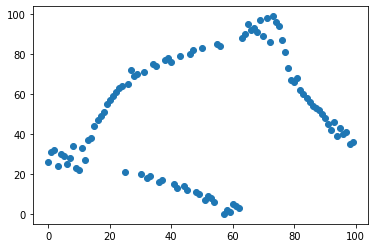

[35000] [3621196, 3621112, 3621110, 3621110, 3621094, 3621084, 3621084, 3621073, 3621073, 3621054] [3612730]


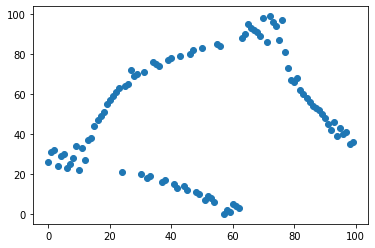

[40000] [3621764, 3621742, 3621530, 3621526, 3621526, 3621526, 3621526, 3621524, 3621444, 3621444] [3615100]


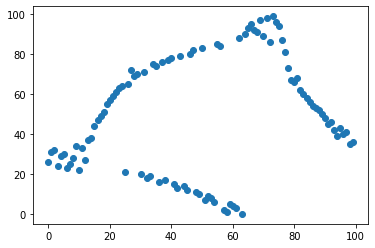

[45000] [3622121, 3622121, 3622121, 3622121, 3622121, 3622121, 3622121, 3622121, 3622121, 3622121] [3616423]


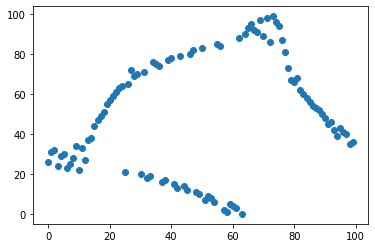

[50000] [3622232, 3622215, 3622215, 3622210, 3622210, 3622210, 3622210, 3622210, 3622210, 3622210] [3618190]


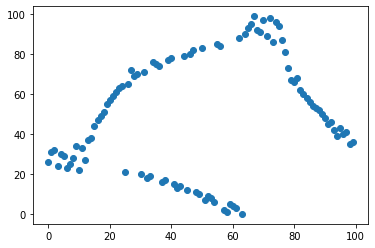

[55000] [3622326, 3622321, 3622318, 3622302, 3622300, 3622295, 3622287, 3622286, 3622283, 3622272] [3618833]


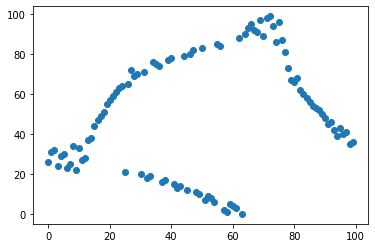

[60000] [3622608, 3622608, 3622608, 3622441, 3622441, 3622432, 3622432, 3622429, 3622421, 3622414] [3619537]


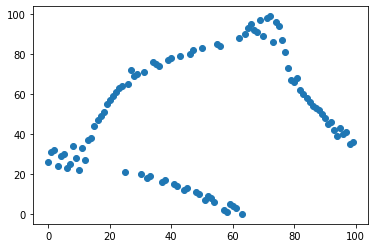

[65000] [3623183, 3623183, 3622899, 3622841, 3622810, 3622803, 3622751, 3622742, 3622739, 3622739] [3620487]


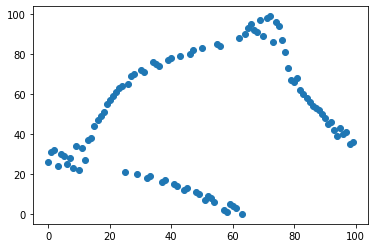

[70000] [3623424, 3623423, 3623416, 3623409, 3623405, 3623405, 3623345, 3623327, 3623322, 3623322] [3620747]


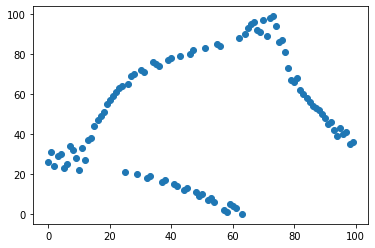

[75000] [3623923, 3623893, 3623829, 3623829, 3623829, 3623827, 3623827, 3623822, 3623808, 3623790] [3621103]


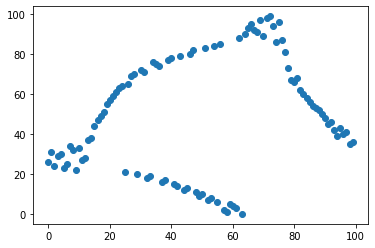

[80000] [3624336, 3624336, 3624212, 3624169, 3624165, 3624150, 3624150, 3624138, 3624085, 3623998] [3621751]


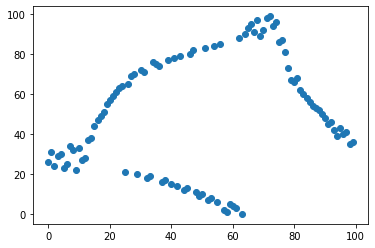

[85000] [3624350, 3624349, 3624349, 3624349, 3624349, 3624349, 3624349, 3624348, 3624348, 3624348] [3622121]


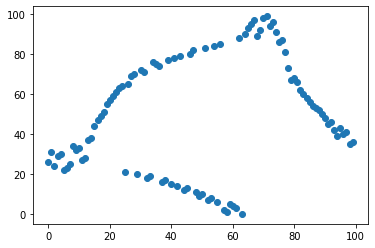

[90000] [3624362, 3624357, 3624354, 3624354, 3624354, 3624354, 3624354, 3624354, 3624354, 3624354] [3622215]


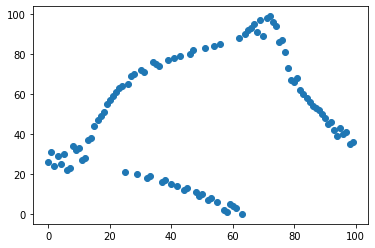

[95000] [3624363, 3624363, 3624363, 3624363, 3624363, 3624363, 3624363, 3624363, 3624362, 3624362] [3622300]


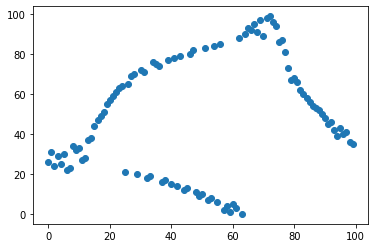

[100000] [3624795, 3624795, 3624795, 3624795, 3624473, 3624378, 3624368, 3624363, 3624363, 3624363] [3622430]


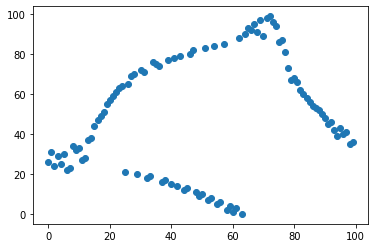

[105000] [3624811, 3624811, 3624811, 3624811, 3624795, 3624795, 3624795, 3624795, 3624795, 3624795] [3622742]


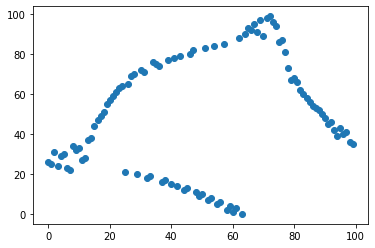

[110000] [3624816, 3624816, 3624816, 3624816, 3624816, 3624816, 3624816, 3624816, 3624816, 3624816] [3623345]


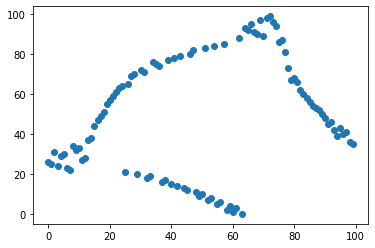

[115000] [3624816, 3624816, 3624816, 3624816, 3624816, 3624816, 3624816, 3624816, 3624816, 3624816] [3623790]


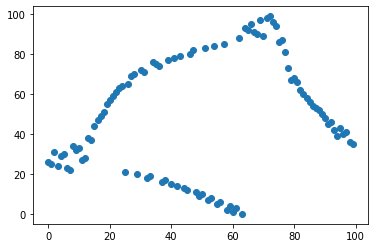

[120000] [3625232, 3625232, 3625232, 3625232, 3625232, 3625232, 3624820, 3624820, 3624819, 3624819] [3623987]


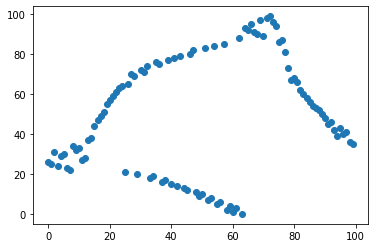

[125000] [3625239, 3625239, 3625239, 3625236, 3625235, 3625235, 3625235, 3625235, 3625235, 3625235] [3624338]


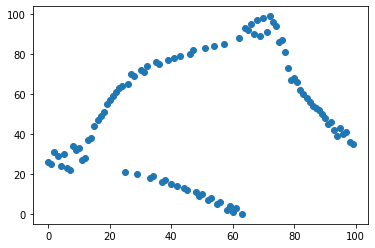

[130000] [3625468, 3625468, 3625468, 3625468, 3625468, 3625468, 3625468, 3625468, 3625468, 3625468] [3624354]


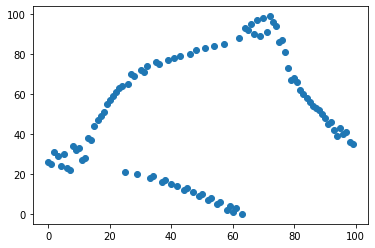

[135000] [3625471, 3625471, 3625471, 3625471, 3625471, 3625471, 3625471, 3625471, 3625471, 3625471] [3624362]


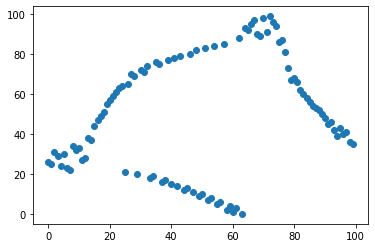

[140000] [3625473, 3625473, 3625473, 3625473, 3625473, 3625473, 3625473, 3625471, 3625471, 3625471] [3624363]


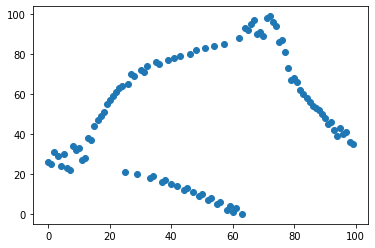

[145000] [3625473, 3625473, 3625473, 3625473, 3625473, 3625473, 3625473, 3625473, 3625473, 3625473] [3624795]


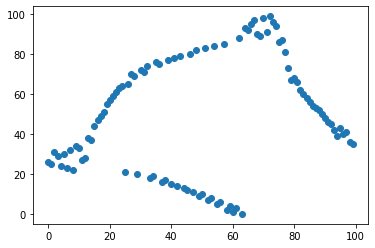

[150000] [3625837, 3625837, 3625477, 3625477, 3625477, 3625477, 3625477, 3625477, 3625477, 3625477] [3624816]


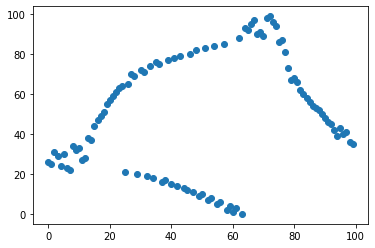

[155000] [3625841, 3625841, 3625841, 3625841, 3625841, 3625841, 3625841, 3625841, 3625841, 3625841] [3624816]


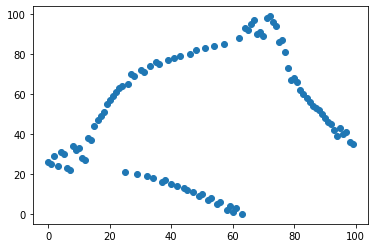

[160000] [3625843, 3625841, 3625841, 3625841, 3625841, 3625841, 3625841, 3625841, 3625841, 3625841] [3624819]


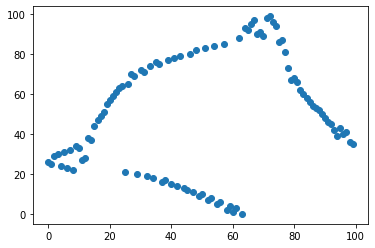

[165000] [3625843, 3625843, 3625843, 3625843, 3625843, 3625843, 3625843, 3625843, 3625843, 3625843] [3625235]


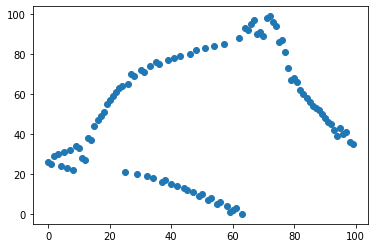

[170000] [3625843, 3625843, 3625843, 3625843, 3625843, 3625843, 3625843, 3625843, 3625843, 3625843] [3625465]


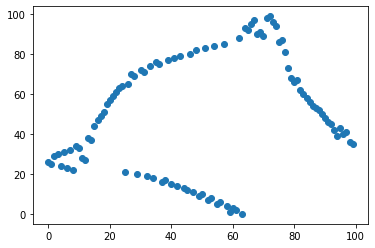

[175000] [3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625843, 3625843, 3625843] [3625468]


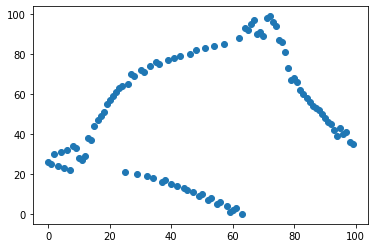

[180000] [3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848] [3625471]


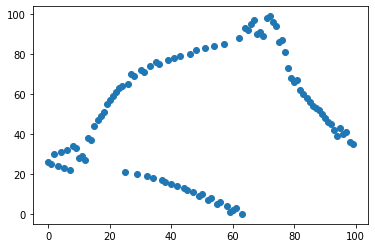

[185000] [3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848] [3625473]


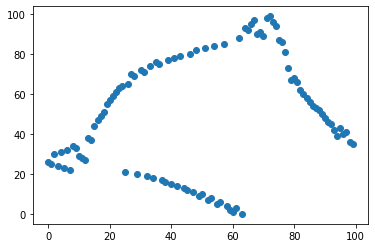

[190000] [3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848] [3625475]


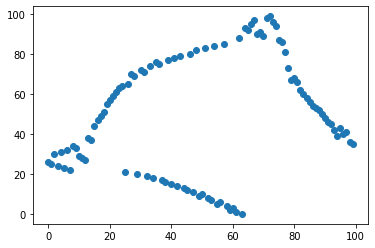

[195000] [3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848] [3625837]


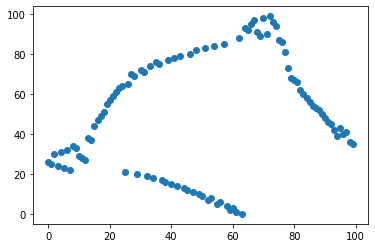

[200000] [3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848] [3625841]


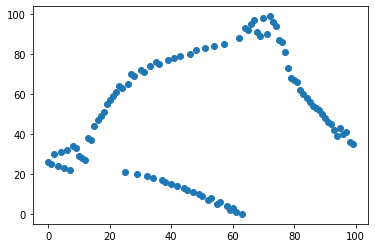

In [27]:
EA100_2 = Evolutionary_Algorithm2_24153_POP(100,EA100)

[10000] [3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848, 3625848] [3625843]


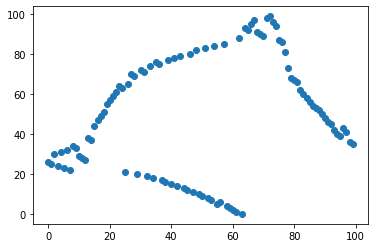

[20000] [3625850, 3625850, 3625850, 3625850, 3625850, 3625850, 3625850, 3625850, 3625850, 3625850] [3625848]


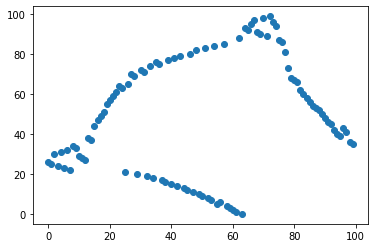

[30000] [3625851, 3625851, 3625851, 3625851, 3625851, 3625851, 3625851, 3625851, 3625851, 3625851] [3625848]


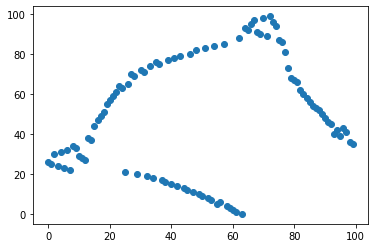

KeyboardInterrupt: 

In [30]:
    EA100_3 = Evolutionary_Algorithm2_24153_POP(100,EA100_2)

[5000] [147710, 144341, 141940, 138870, 137745, 137012, 135710, 134734, 133181, 133116] [48445]


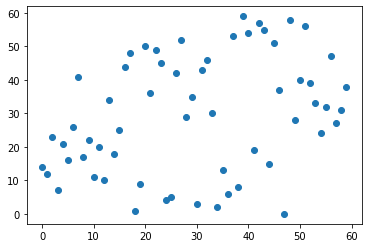

[10000] [165295, 164985, 164835, 164254, 163173, 160923, 160783, 160287, 160175, 160061] [78112]


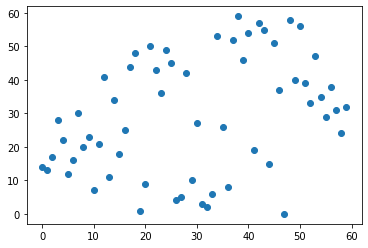

[15000] [212896, 197860, 197428, 196767, 196700, 196558, 196203, 194775, 194612, 193699] [108346]


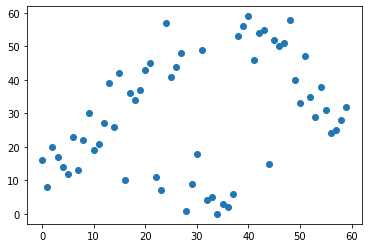

[20000] [218174, 218051, 217333, 217302, 216769, 216422, 216415, 215762, 215649, 215333] [139568]


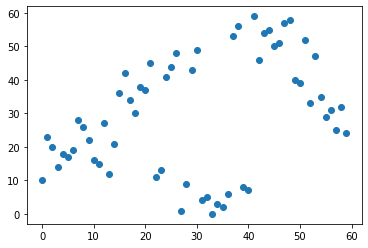

[25000] [239500, 238883, 238045, 237568, 236747, 235560, 232849, 231522, 231492, 231462] [169237]


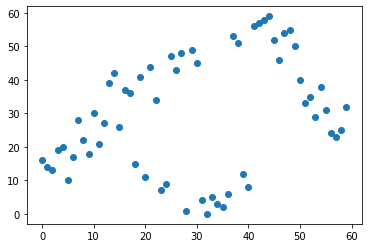

[30000] [247163, 246273, 244281, 243850, 243850, 243850, 243821, 243809, 243774, 243251] [191587]


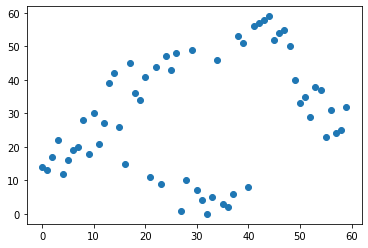

[35000] [253592, 251648, 250117, 249750, 249750, 249691, 249058, 249005, 249001, 248893] [206742]


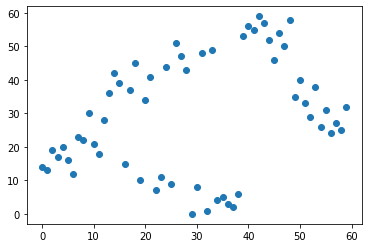

[40000] [259441, 258905, 258314, 257491, 257472, 257000, 256807, 256702, 256695, 256695] [218881]


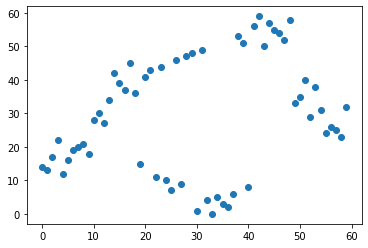

[45000] [261412, 261412, 261394, 260881, 260758, 260408, 260250, 260201, 260121, 260086] [227580]


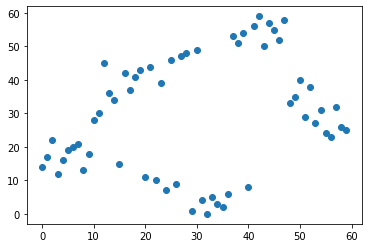

[50000] [267815, 267091, 266097, 265678, 265273, 265078, 264793, 264761, 264665, 264460] [235398]


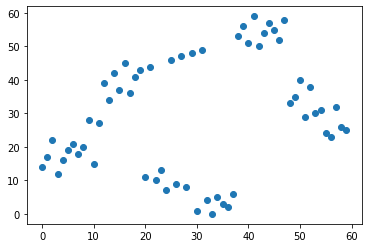

[55000] [270585, 269071, 268689, 267948, 267847, 267847, 267822, 267815, 267773, 267767] [242615]


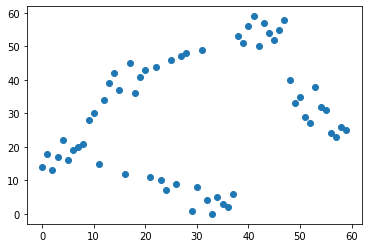

[60000] [270928, 270928, 270756, 270662, 270585, 270562, 270405, 270378, 270344, 270312] [248199]


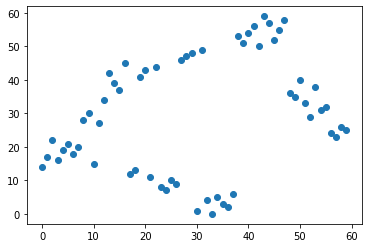

[65000] [272286, 272207, 272202, 272058, 272029, 271887, 271887, 271885, 271845, 271839] [252756]


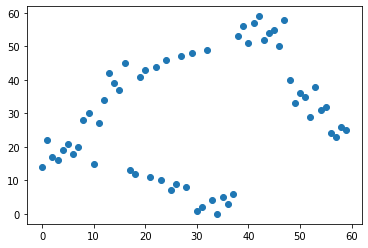

[70000] [273783, 273337, 273170, 273037, 273037, 272961, 272907, 272907, 272907, 272907] [257328]


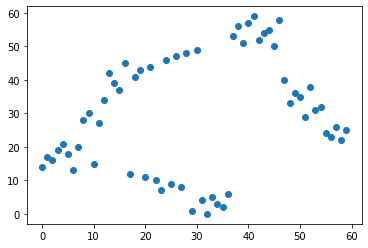

[75000] [274690, 274686, 274552, 274512, 274471, 274468, 274441, 274421, 274420, 274349] [261084]


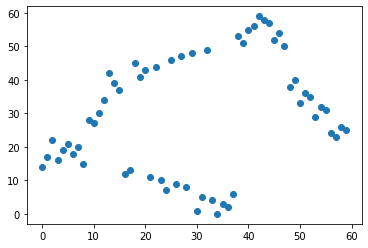

[80000] [276582, 275921, 275886, 275738, 275738, 275738, 275738, 275738, 275699, 275661] [264170]


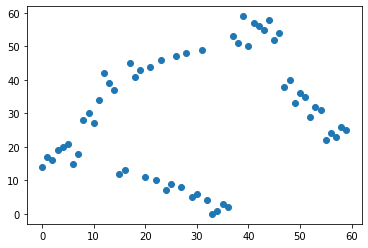

[85000] [277592, 277417, 277275, 276582, 276582, 276453, 276402, 276402, 276402, 276402] [266886]


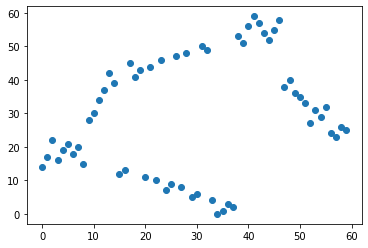

[90000] [277592, 277592, 277417, 277417, 277386, 277310, 277310, 277310, 277310, 277310] [269215]


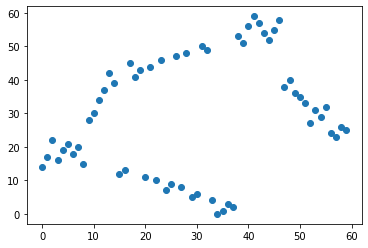

[95000] [278648, 278648, 278043, 278028, 277997, 277805, 277805, 277801, 277801, 277801] [271310]


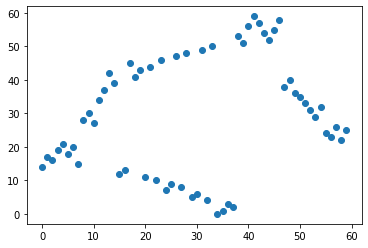

[100000] [279019, 278911, 278686, 278676, 278672, 278672, 278672, 278672, 278648, 278648] [272490]


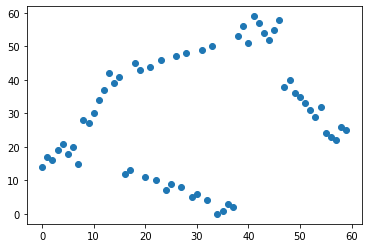

[105000] [279072, 279037, 279019, 279019, 278911, 278911, 278911, 278911, 278911, 278911] [273508]


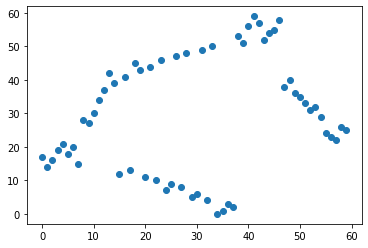

[110000] [279091, 279072, 279072, 279037, 279037, 279037, 279037, 279037, 279037, 279025] [274441]


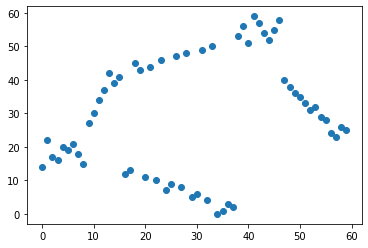

[115000] [279207, 279207, 279207, 279207, 279207, 279207, 279206, 279206, 279206, 279206] [275381]


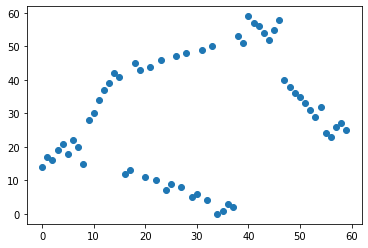

[120000] [279369, 279369, 279369, 279368, 279368, 279368, 279368, 279368, 279368, 279368] [275961]


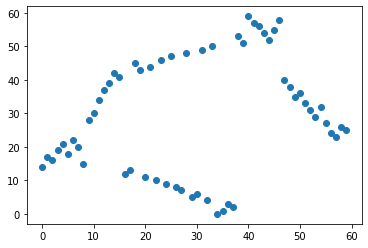

[125000] [279383, 279382, 279372, 279372, 279372, 279372, 279372, 279372, 279372, 279371] [276734]


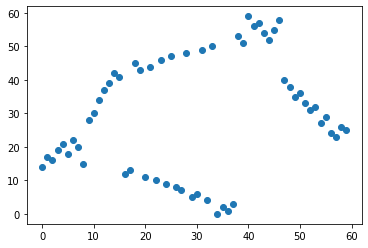

[130000] [279561, 279514, 279514, 279513, 279513, 279513, 279512, 279512, 279512, 279512] [277310]


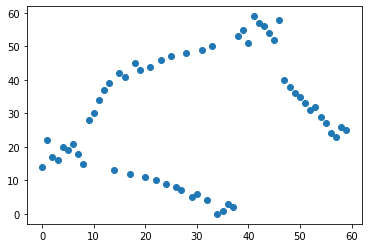

[135000] [279676, 279675, 279610, 279567, 279567, 279567, 279566, 279566, 279566, 279566] [277801]


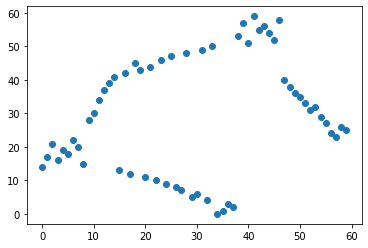

[140000] [279841, 279756, 279756, 279728, 279713, 279713, 279712, 279711, 279711, 279711] [278018]


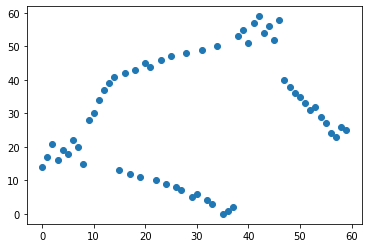

[145000] [279850, 279850, 279850, 279849, 279845, 279844, 279844, 279844, 279844, 279844] [278491]


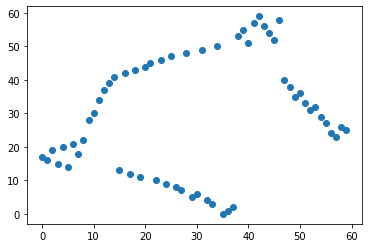

[150000] [279886, 279885, 279884, 279884, 279883, 279883, 279883, 279883, 279883, 279883] [278911]


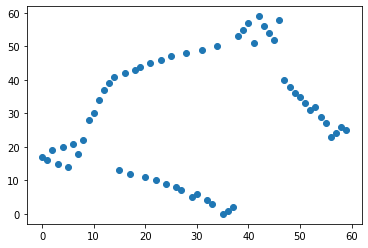

[155000] [279906, 279906, 279905, 279904, 279904, 279904, 279904, 279904, 279901, 279892] [279206]


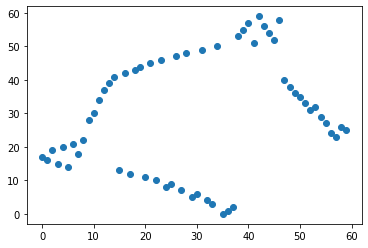

[160000] [279918, 279918, 279918, 279917, 279917, 279917, 279914, 279913, 279913, 279913] [279368]


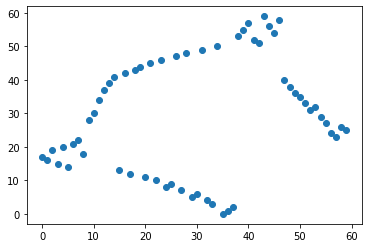

[165000] [279926, 279926, 279922, 279922, 279922, 279918, 279918, 279918, 279918, 279918] [279372]


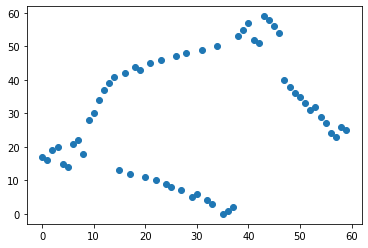

[170000] [279926, 279926, 279926, 279926, 279926, 279926, 279926, 279926, 279926, 279926] [279514]


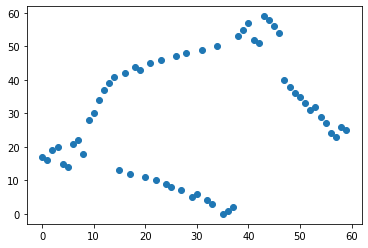

[175000] [279926, 279926, 279926, 279926, 279926, 279926, 279926, 279926, 279926, 279926] [279569]


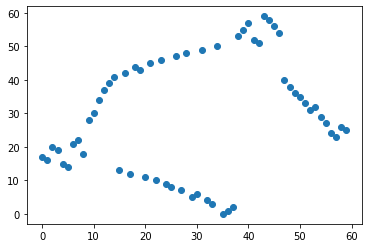

[180000] [279926, 279926, 279926, 279926, 279926, 279926, 279926, 279926, 279926, 279926] [279727]


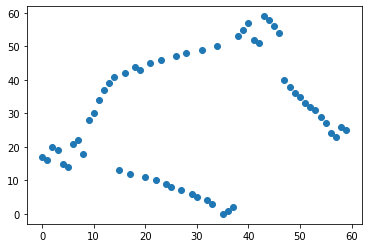

[185000] [279926, 279926, 279926, 279926, 279926, 279926, 279926, 279926, 279926, 279926] [279844]


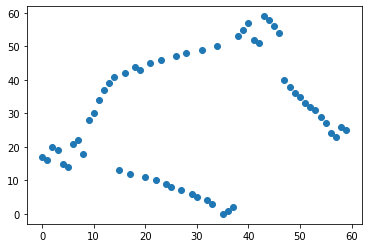

[190000] [279927, 279927, 279927, 279927, 279927, 279927, 279927, 279927, 279927, 279927] [279883]


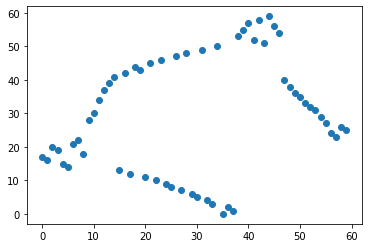

[195000] [279927, 279927, 279927, 279927, 279927, 279927, 279927, 279927, 279927, 279927] [279902]


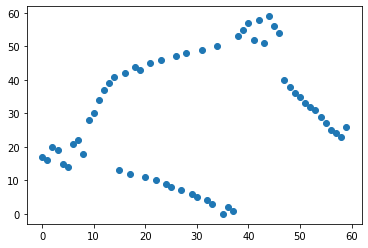

[200000] [279927, 279927, 279927, 279927, 279927, 279927, 279927, 279927, 279927, 279927] [279913]


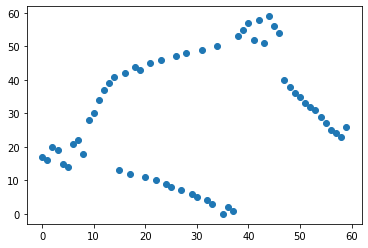

In [31]:
EA60 = Evolutionary_Algorithm2_24153(60)

[10000] [280093, 279927, 279927, 279927, 279927, 279927, 279927, 279927, 279927, 279927] [279926]


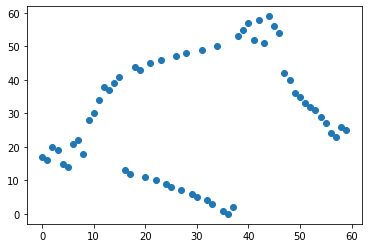

[20000] [280464, 280093, 280093, 280093, 280093, 280093, 280093, 280093, 280093, 280093] [279926]


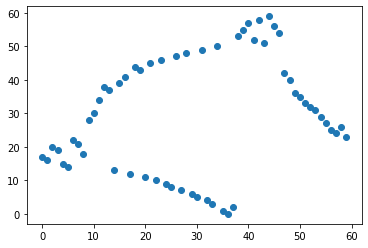

[30000] [280494, 280479, 280466, 280466, 280466, 280466, 280466, 280466, 280466, 280466] [279927]


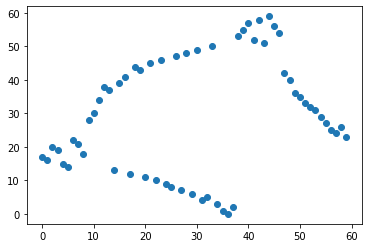

[40000] [280574, 280574, 280574, 280574, 280574, 280574, 280574, 280574, 280566, 280533] [279927]


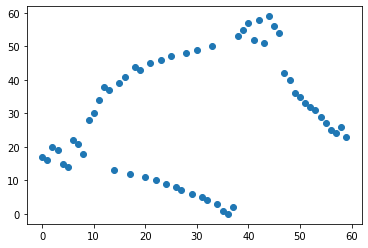

[50000] [280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667] [279927]


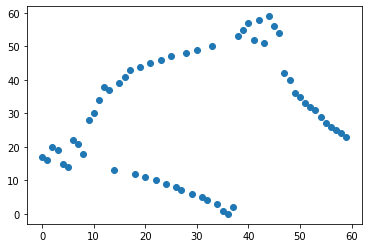

[60000] [280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667] [280093]


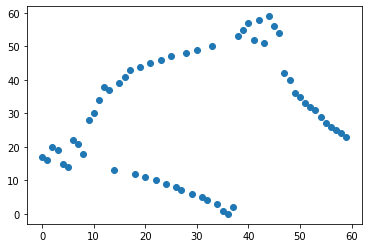

[70000] [280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667] [280466]


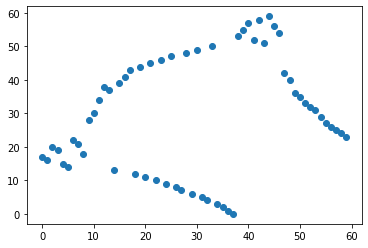

[80000] [280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667] [280571]


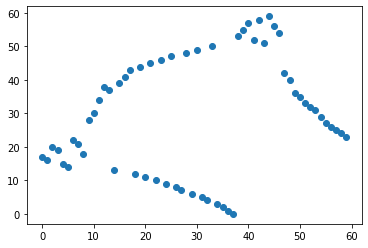

[90000] [280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667] [280667]


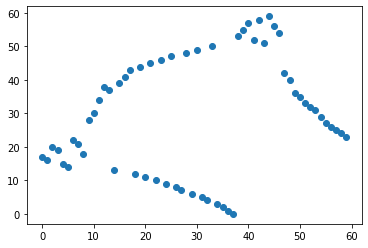

[100000] [280765, 280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667, 280667] [280667]


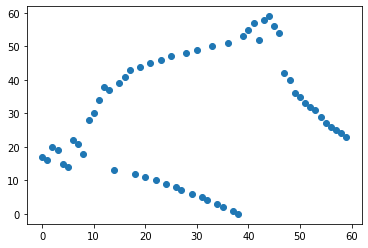

[110000] [280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815] [280667]


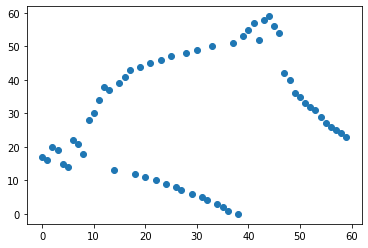

[120000] [280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815] [280667]


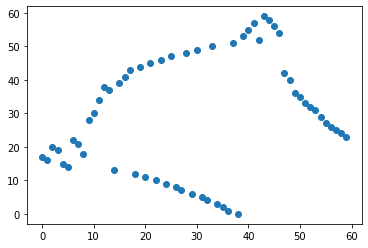

[130000] [280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815] [280667]


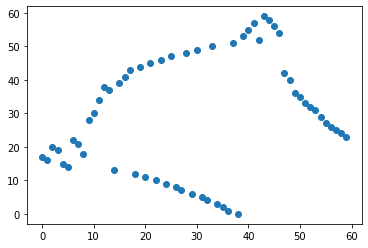

[140000] [280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815] [280667]


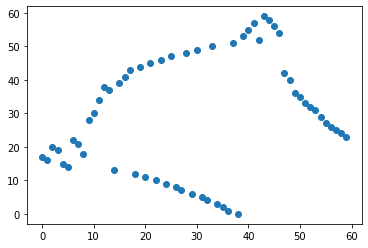

[150000] [280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815] [280807]


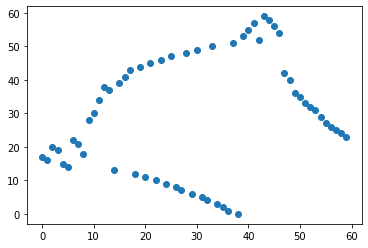

[160000] [280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815] [280815]


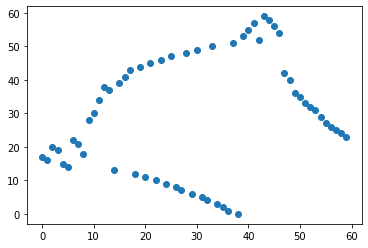

[170000] [280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815] [280815]


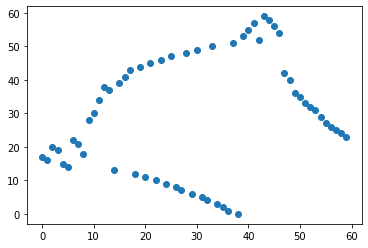

[180000] [280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815] [280815]


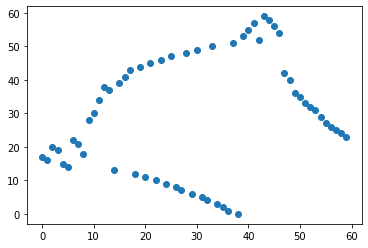

[190000] [280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815] [280815]


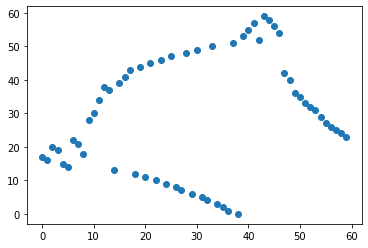

[200000] [280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815, 280815] [280815]


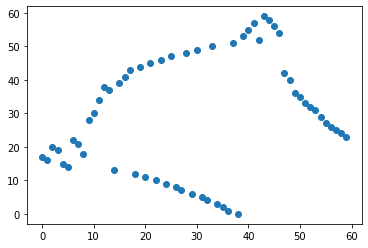

In [34]:
EA60_2 = Evolutionary_Algorithm2_24153_POP(60,EA60)

In [36]:
EA60_2 = Evolutionary_Algorithm2_24153_POP(60,EA60)

KeyboardInterrupt: 

In [45]:
def Evolutionary_Algorithm2_25314(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(5000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_25314(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<50001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,60)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover2(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_25314(child1)
        fitness2 = count_25314(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:5000]
        if fe % 5000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

[5000] [59137, 56037, 56030, 56026, 55800, 55423, 55415, 53638, 53596, 53349] [15142]


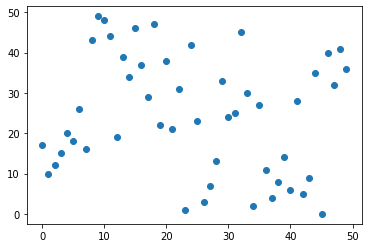

[10000] [70075, 67011, 66859, 66546, 65043, 64592, 64304, 64236, 64000, 63974] [19576]


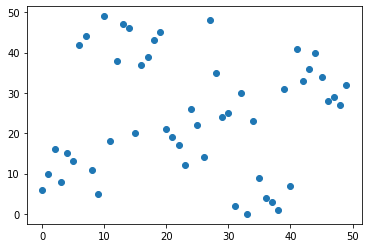

[15000] [75609, 73761, 73761, 72691, 72691, 72612, 72089, 71332, 71005, 70971] [26528]


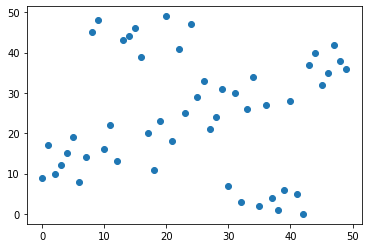

[20000] [79709, 78827, 78808, 78808, 77732, 76590, 76340, 76297, 76211, 76159] [37750]


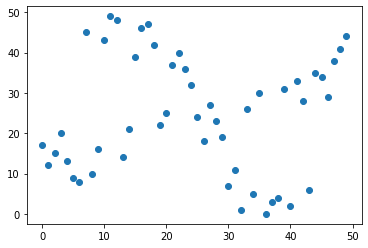

[25000] [84016, 83346, 82924, 82552, 82391, 82256, 82233, 82013, 81785, 81386] [46289]


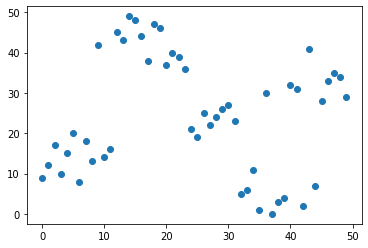

[30000] [87670, 87027, 86547, 86047, 85958, 85761, 85541, 85296, 85225, 84911] [53790]


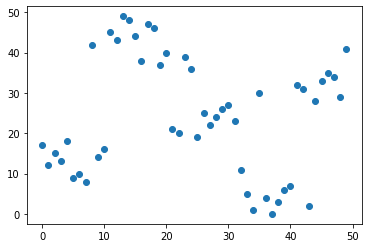

[35000] [89345, 88918, 88628, 88589, 87968, 87943, 87937, 87784, 87759, 87670] [60337]


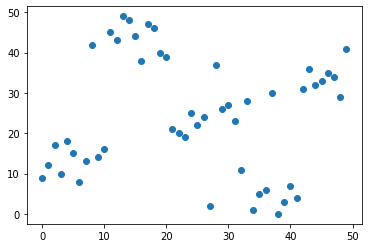

[40000] [91725, 91010, 90394, 90247, 90111, 90071, 90066, 90055, 90055, 89944] [66201]


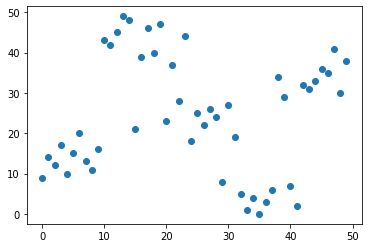

[45000] [93387, 92765, 92595, 92354, 92354, 91725, 91713, 91608, 91271, 91166] [70806]


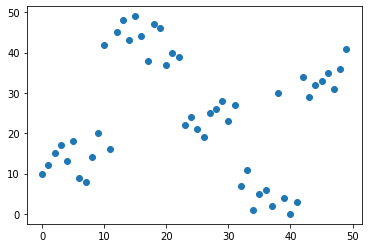

[50000] [93596, 93584, 93387, 93335, 93209, 93079, 93038, 92833, 92822, 92803] [74310]


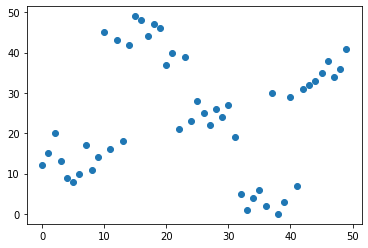

[55000] [97107, 95850, 94811, 94735, 94733, 94624, 94515, 94486, 94484, 94466] [77140]


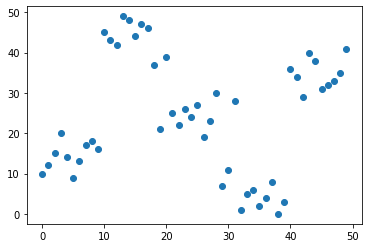

[60000] [97107, 96421, 95850, 95798, 95728, 95611, 95595, 95595, 95595, 95595] [79654]


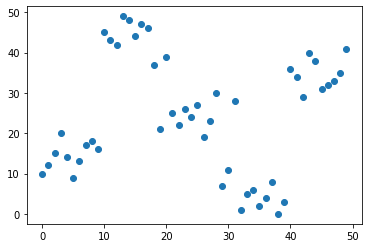

[65000] [97107, 97107, 96984, 96814, 96490, 96464, 96463, 96422, 96421, 96421] [81810]


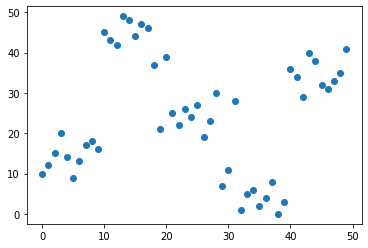

[70000] [97517, 97240, 97114, 97110, 97107, 97107, 97107, 97106, 96987, 96984] [83710]


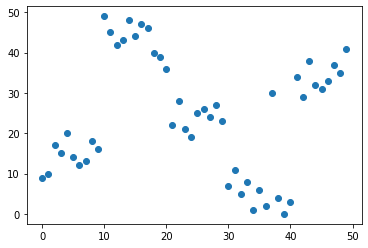

[75000] [97870, 97600, 97566, 97555, 97555, 97555, 97520, 97518, 97517, 97517] [85475]


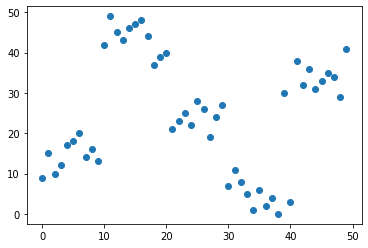

[80000] [98097, 98015, 97972, 97935, 97877, 97871, 97870, 97831, 97785, 97785] [87086]


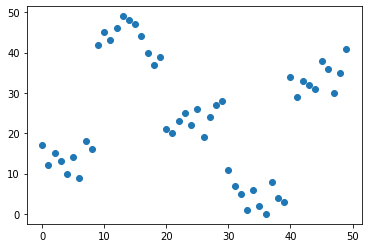

[85000] [98097, 98015, 97974, 97973, 97972, 97967, 97961, 97935, 97928, 97898] [88520]


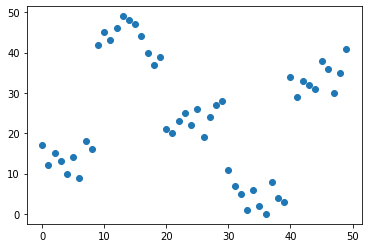

[90000] [98260, 98253, 98253, 98251, 98242, 98200, 98139, 98123, 98122, 98122] [89756]


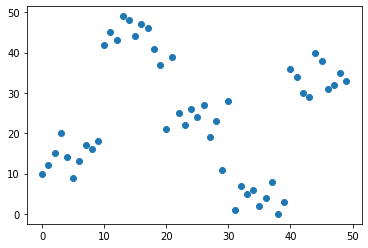

[95000] [98637, 98443, 98443, 98439, 98439, 98383, 98351, 98351, 98347, 98347] [90923]


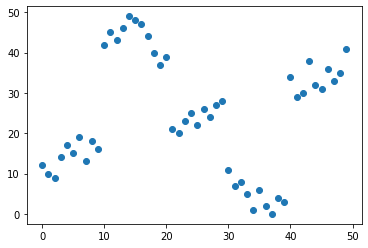

[100000] [98637, 98530, 98528, 98527, 98527, 98527, 98527, 98518, 98488, 98452] [92130]


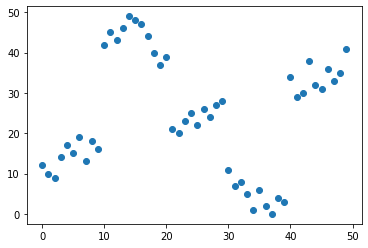

[105000] [98913, 98643, 98637, 98559, 98558, 98540, 98536, 98535, 98534, 98533] [93155]


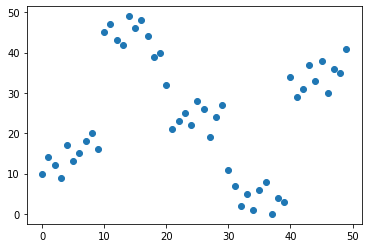

[110000] [98917, 98916, 98915, 98913, 98913, 98913, 98913, 98909, 98815, 98644] [94136]


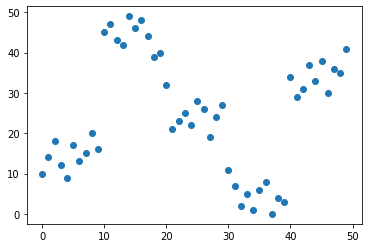

[115000] [98960, 98922, 98921, 98920, 98920, 98920, 98918, 98918, 98917, 98917] [94997]


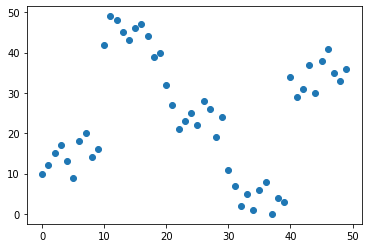

[120000] [98989, 98988, 98981, 98960, 98960, 98957, 98926, 98926, 98926, 98924] [95614]


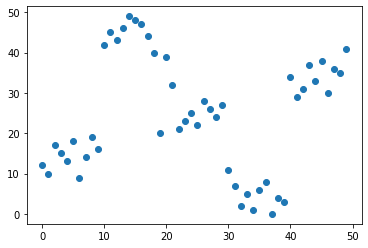

[125000] [99002, 99002, 99002, 99002, 99002, 99001, 99000, 99000, 98998, 98998] [96063]


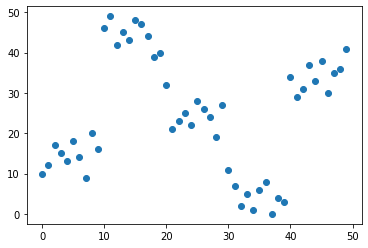

[130000] [99155, 99142, 99034, 99033, 99032, 99032, 99030, 99029, 99029, 99028] [96516]


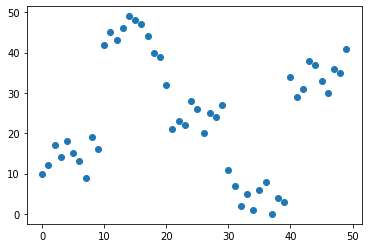

[135000] [99163, 99155, 99155, 99155, 99147, 99147, 99146, 99146, 99142, 99138] [96968]


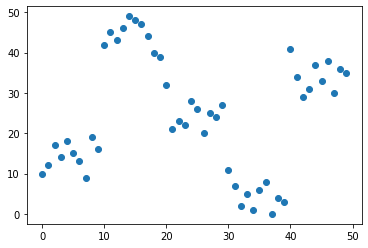

[140000] [99163, 99163, 99163, 99159, 99156, 99155, 99155, 99155, 99155, 99155] [97258]


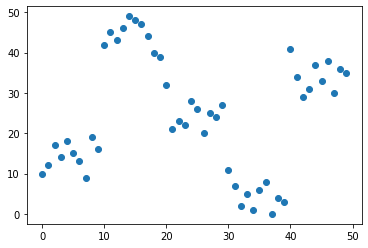

[145000] [99163, 99163, 99163, 99163, 99163, 99163, 99163, 99163, 99163, 99163] [97557]


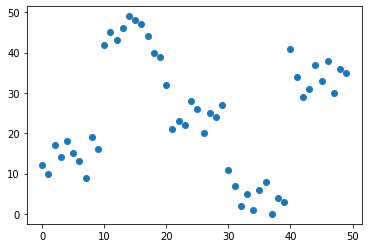

[150000] [99179, 99179, 99176, 99174, 99172, 99169, 99169, 99167, 99167, 99167] [97783]


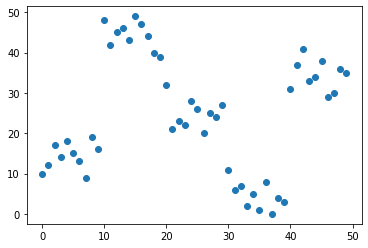

[155000] [99188, 99188, 99187, 99185, 99184, 99184, 99183, 99183, 99183, 99182] [98044]


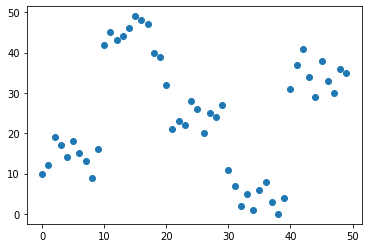

[160000] [99198, 99198, 99196, 99195, 99195, 99195, 99195, 99194, 99194, 99193] [98245]


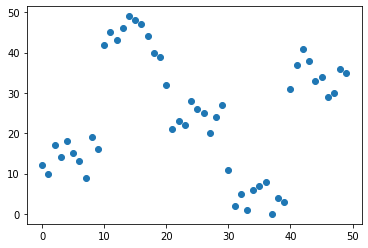

[165000] [99618, 99207, 99206, 99206, 99206, 99206, 99206, 99205, 99204, 99204] [98349]


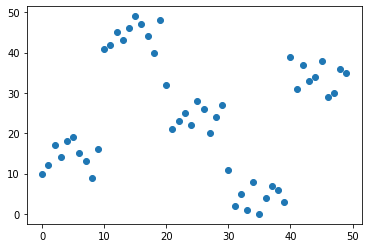

[170000] [99634, 99624, 99618, 99214, 99213, 99212, 99211, 99210, 99210, 99210] [98471]


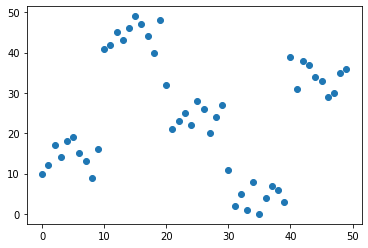

[175000] [99634, 99634, 99634, 99634, 99634, 99634, 99630, 99630, 99624, 99624] [98535]


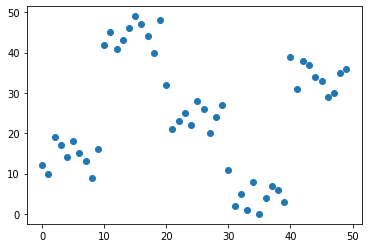

[180000] [99634, 99634, 99634, 99634, 99634, 99634, 99634, 99634, 99634, 99634] [98568]


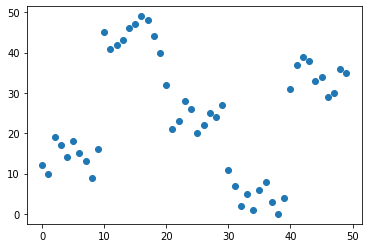

[185000] [99643, 99643, 99640, 99639, 99638, 99638, 99638, 99638, 99638, 99636] [98777]


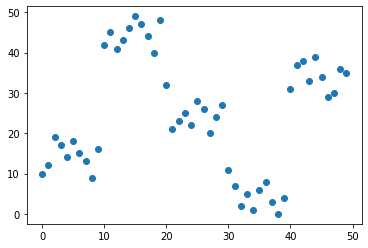

[190000] [99650, 99649, 99649, 99649, 99649, 99649, 99649, 99648, 99647, 99647] [98921]


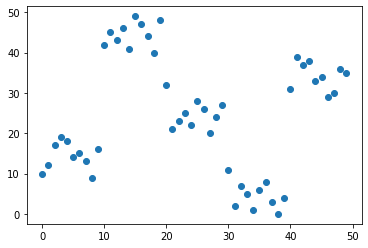

[195000] [99771, 99659, 99657, 99657, 99657, 99657, 99656, 99656, 99655, 99655] [98999]


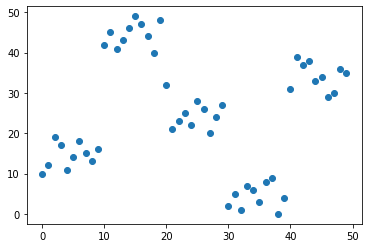

[200000] [99778, 99771, 99770, 99659, 99659, 99659, 99659, 99659, 99659, 99659] [99028]


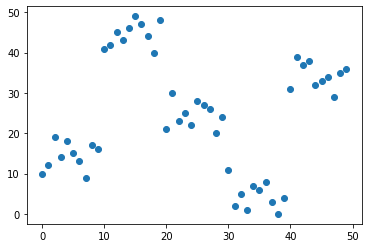

In [40]:
EA50 = Evolutionary_Algorithm2_25314(50)

In [41]:
def Evolutionary_Algorithm2_25314_POP(n,POP):
    #initialize population and compute fitness for each individual
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,60)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover2(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_25314(child1)
        fitness2 = count_25314(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:15000]
        if fe % 5000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

[5000] [99789, 99780, 99778, 99771, 99771, 99770, 99666, 99664, 99664, 99662] [99038]


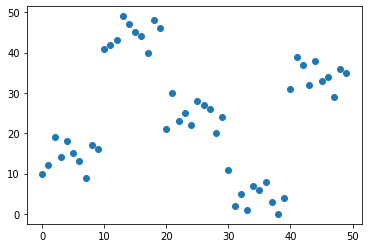

[10000] [99800, 99800, 99800, 99798, 99789, 99786, 99781, 99780, 99778, 99778] [99151]


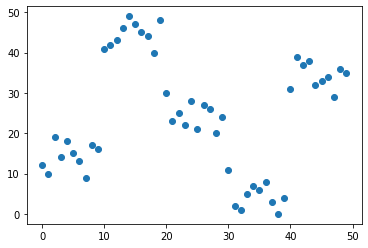

[15000] [99801, 99800, 99800, 99800, 99800, 99800, 99798, 99789, 99786, 99785] [99161]


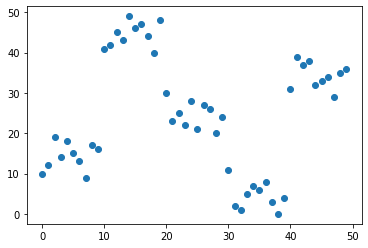

[20000] [99807, 99805, 99801, 99800, 99800, 99800, 99800, 99800, 99800, 99800] [99166]


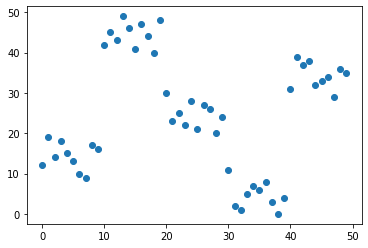

[25000] [99809, 99807, 99807, 99807, 99807, 99806, 99805, 99805, 99805, 99805] [99178]


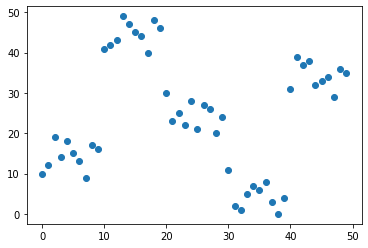

[30000] [99812, 99809, 99809, 99809, 99809, 99809, 99809, 99809, 99809, 99809] [99189]


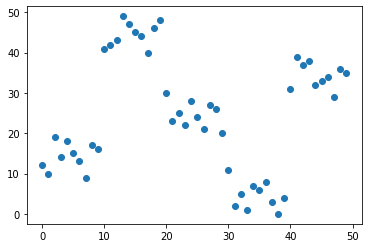

[35000] [99818, 99817, 99816, 99816, 99814, 99814, 99814, 99814, 99814, 99814] [99201]


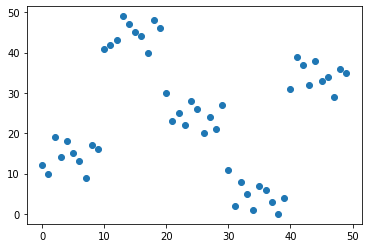

[40000] [99820, 99820, 99819, 99819, 99819, 99819, 99818, 99818, 99818, 99818] [99208]


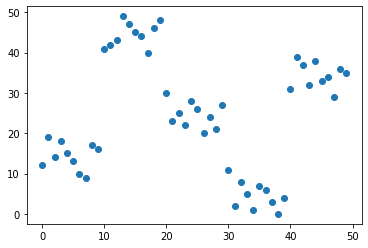

[45000] [99822, 99822, 99822, 99822, 99822, 99822, 99822, 99822, 99822, 99822] [99213]


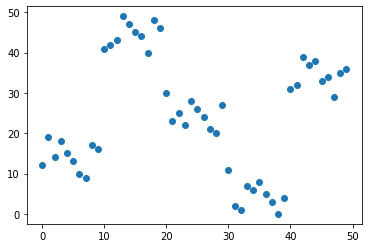

[50000] [99990, 99829, 99827, 99827, 99826, 99826, 99826, 99826, 99826, 99825] [99621]


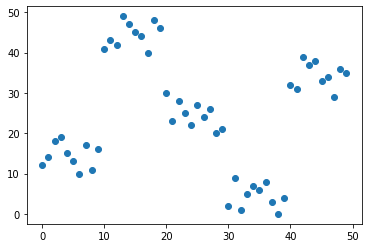

[55000] [99990, 99990, 99832, 99831, 99830, 99829, 99829, 99829, 99829, 99829] [99634]


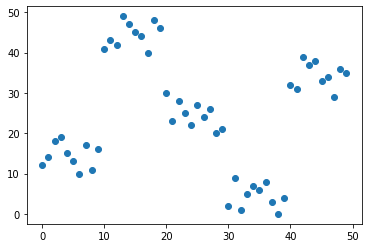

[60000] [99994, 99990, 99990, 99990, 99990, 99990, 99990, 99990, 99990, 99989] [99643]


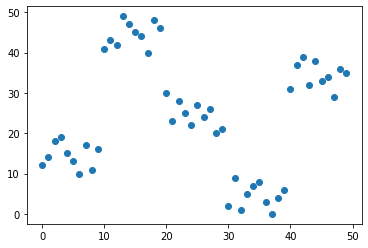

[65000] [99995, 99994, 99994, 99994, 99994, 99993, 99990, 99990, 99990, 99990] [99651]


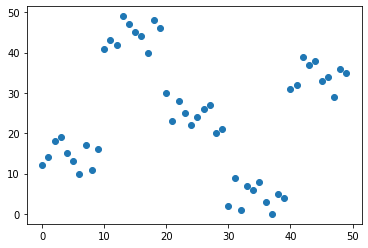

[70000] [99995, 99995, 99995, 99995, 99995, 99995, 99995, 99995, 99994, 99994] [99657]


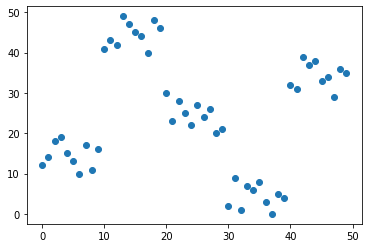

[75000] [99997, 99997, 99997, 99996, 99996, 99995, 99995, 99995, 99995, 99995] [99658]


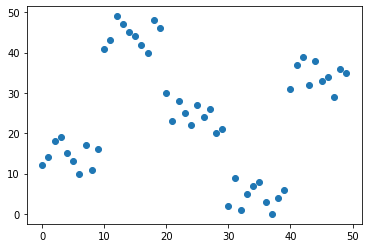

[80000] [100006, 100006, 100003, 100002, 100001, 100001, 100001, 100001, 100001, 100000] [99663]


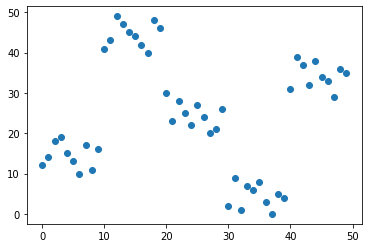

[85000] [100007, 100007, 100006, 100006, 100006, 100006, 100006, 100006, 100006, 100006] [99776]


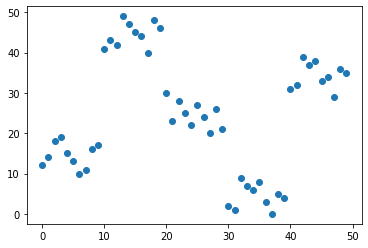

[90000] [100013, 100013, 100013, 100011, 100011, 100010, 100010, 100010, 100010, 100010] [99797]


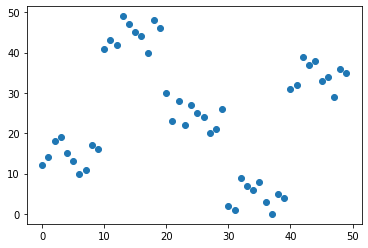

[95000] [100018, 100016, 100016, 100016, 100016, 100016, 100016, 100016, 100016, 100016] [99802]


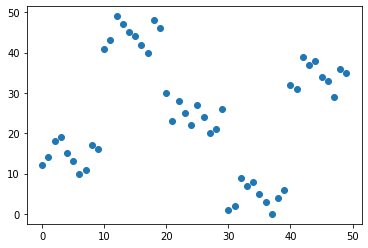

[100000] [100022, 100022, 100020, 100020, 100020, 100020, 100020, 100020, 100020, 100020] [99806]


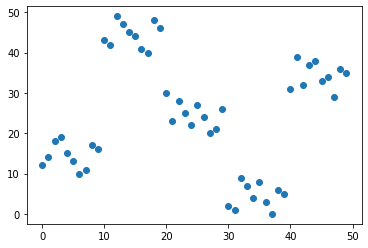

[105000] [100026, 100024, 100024, 100022, 100022, 100022, 100022, 100022, 100022, 100022] [99812]


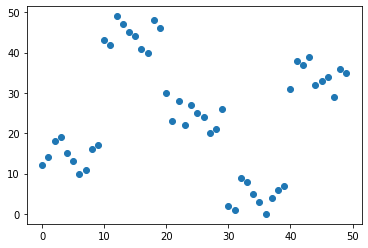

[110000] [100028, 100026, 100026, 100026, 100026, 100026, 100026, 100026, 100026, 100026] [99817]


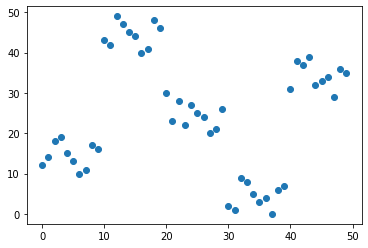

[115000] [100029, 100029, 100028, 100028, 100028, 100028, 100028, 100028, 100028, 100028] [99821]


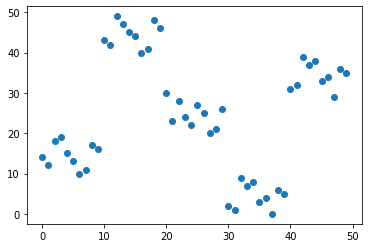

[120000] [100029, 100029, 100029, 100029, 100029, 100029, 100029, 100029, 100029, 100029] [99824]


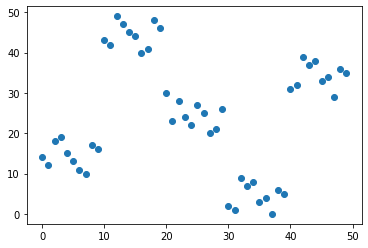

[125000] [100032, 100032, 100032, 100031, 100031, 100031, 100031, 100031, 100031, 100031] [99829]


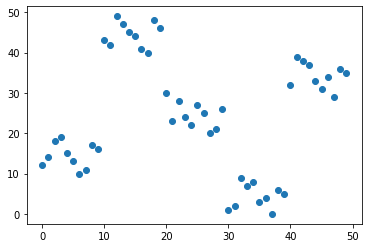

[130000] [100032, 100032, 100032, 100032, 100032, 100032, 100032, 100032, 100032, 100032] [99833]


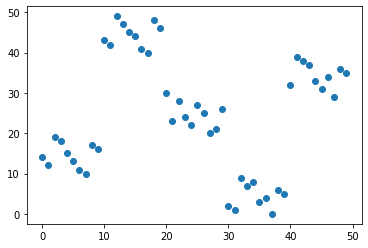

[135000] [100033, 100032, 100032, 100032, 100032, 100032, 100032, 100032, 100032, 100032] [99981]


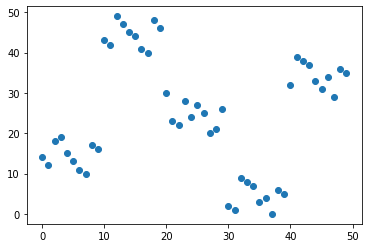

[140000] [100035, 100033, 100033, 100033, 100033, 100033, 100033, 100033, 100032, 100032] [99993]


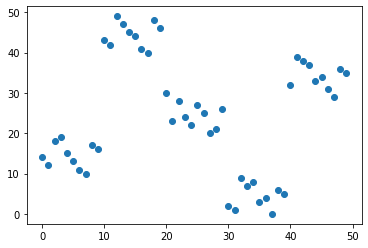

[145000] [100036, 100036, 100036, 100036, 100036, 100035, 100035, 100035, 100035, 100035] [99995]


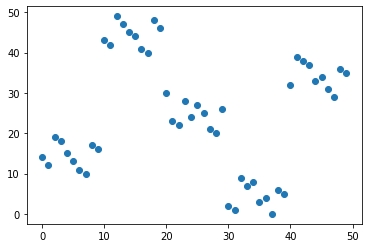

[150000] [100036, 100036, 100036, 100036, 100036, 100036, 100036, 100036, 100036, 100036] [100001]


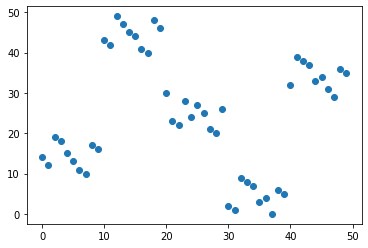

[155000] [100038, 100038, 100038, 100038, 100036, 100036, 100036, 100036, 100036, 100036] [100006]


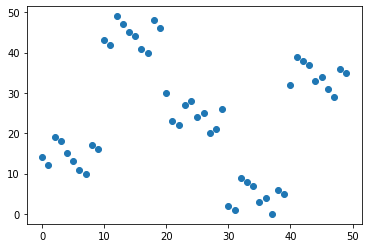

[160000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100010]


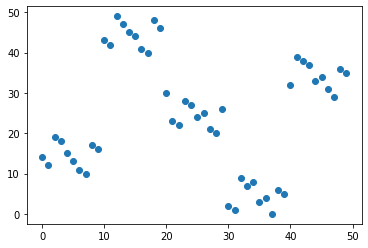

[165000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100014]


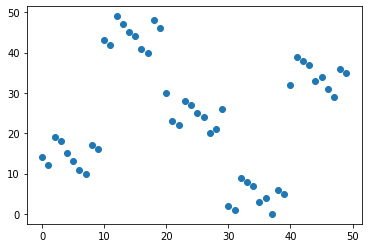

[170000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100018]


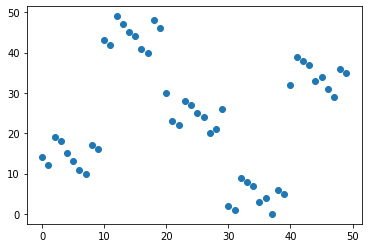

[175000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100022]


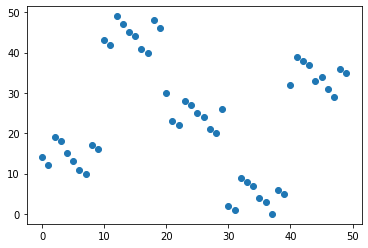

[180000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100024]


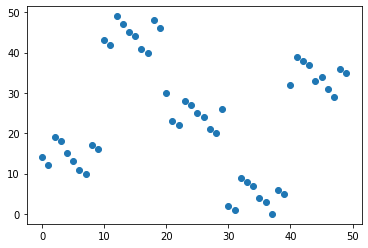

[185000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100026]


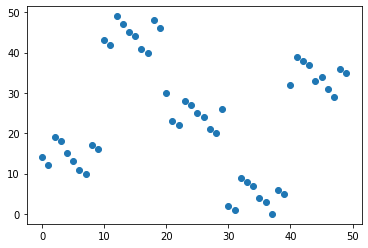

[190000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100028]


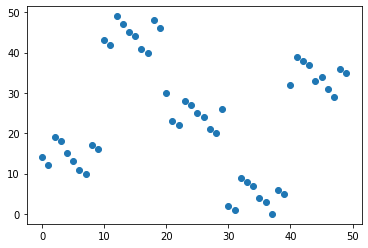

[195000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100029]


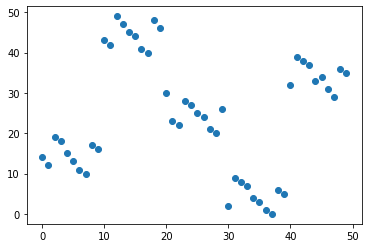

[200000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100031]


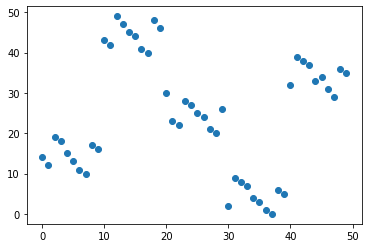

In [42]:
EA50_2 = Evolutionary_Algorithm2_25314_POP(50,EA50)

[5000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100032]


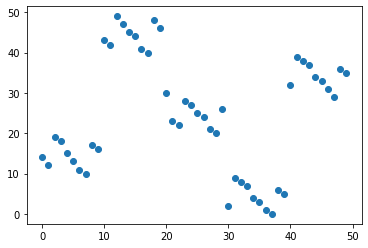

[10000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100032]


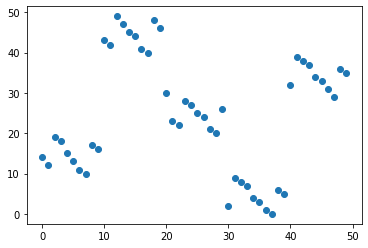

[15000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100032]


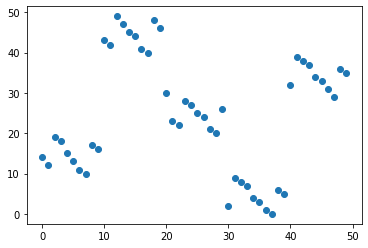

[20000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100035]


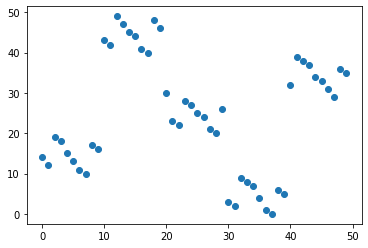

[25000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100036]


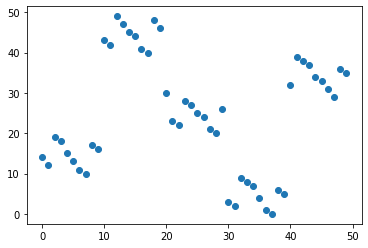

[30000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100036]


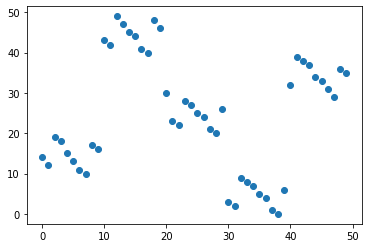

[35000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100038]


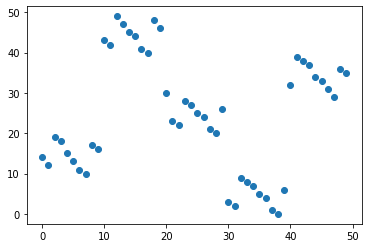

[40000] [100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100038]


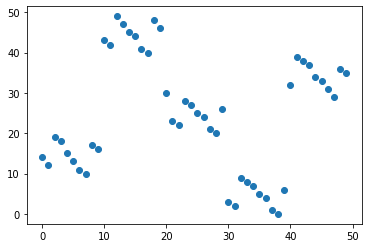

[45000] [100046, 100046, 100038, 100038, 100038, 100038, 100038, 100038, 100038, 100038] [100038]


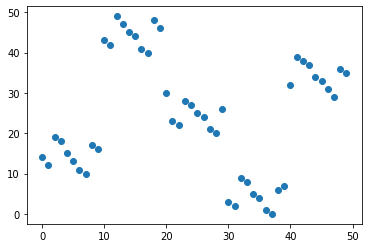

[50000] [100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046] [100038]


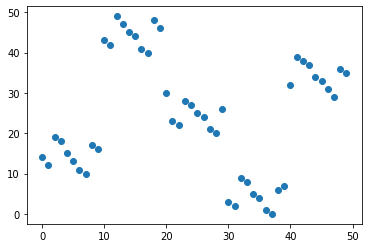

[55000] [100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046] [100038]


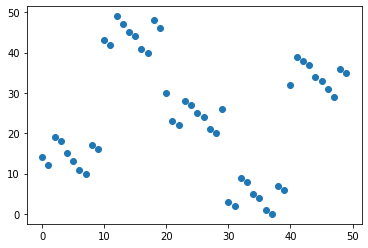

[60000] [100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046] [100038]


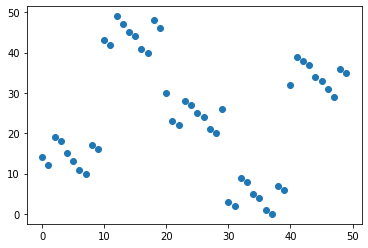

[65000] [100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046] [100038]


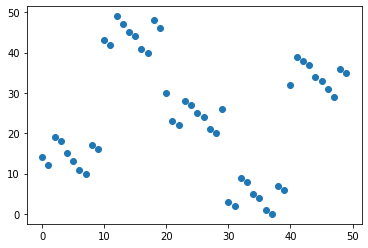

[70000] [100122, 100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046] [100038]


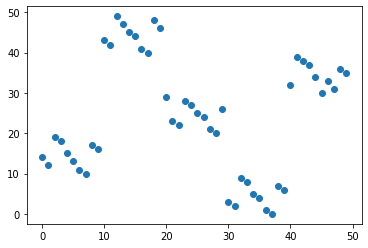

[75000] [100128, 100122, 100046, 100046, 100046, 100046, 100046, 100046, 100046, 100046] [100038]


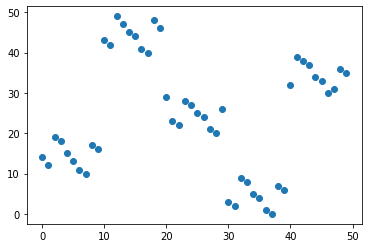

[80000] [100128, 100128, 100122, 100122, 100046, 100046, 100046, 100046, 100046, 100046] [100038]


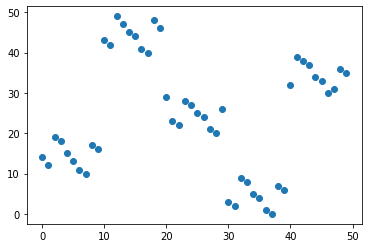

[85000] [100128, 100128, 100128, 100128, 100128, 100128, 100128, 100128, 100128, 100128] [100038]


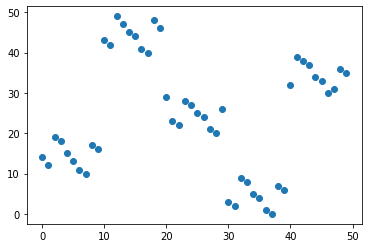

[90000] [100128, 100128, 100128, 100128, 100128, 100128, 100128, 100128, 100128, 100128] [100038]


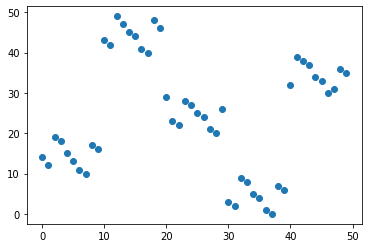

[95000] [100136, 100136, 100130, 100130, 100130, 100128, 100128, 100128, 100128, 100128] [100038]


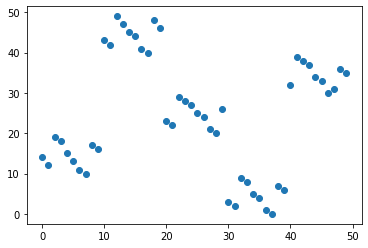

[100000] [100136, 100136, 100136, 100136, 100136, 100136, 100136, 100136, 100136, 100136] [100038]


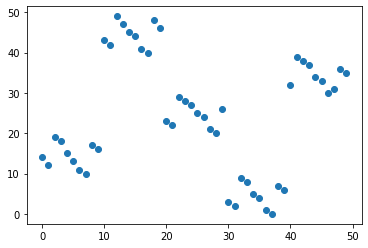

[105000] [100136, 100136, 100136, 100136, 100136, 100136, 100136, 100136, 100136, 100136] [100038]


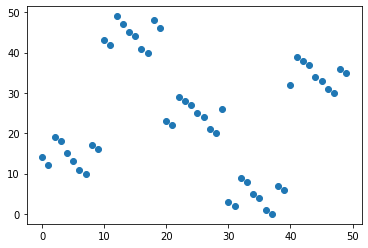

[110000] [100136, 100136, 100136, 100136, 100136, 100136, 100136, 100136, 100136, 100136] [100038]


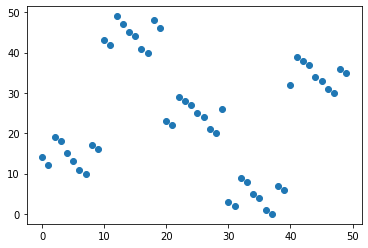

[115000] [100140, 100140, 100140, 100140, 100136, 100136, 100136, 100136, 100136, 100136] [100038]


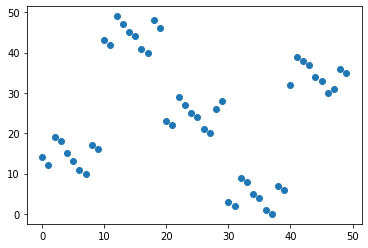

[120000] [100140, 100140, 100140, 100140, 100140, 100140, 100140, 100140, 100140, 100140] [100038]


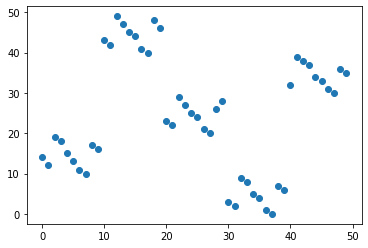

[125000] [100144, 100144, 100144, 100140, 100140, 100140, 100140, 100140, 100140, 100140] [100046]


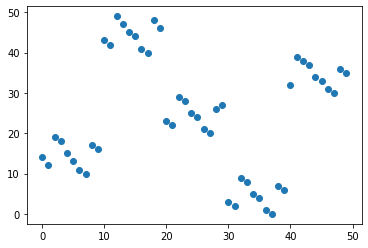

[130000] [100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144] [100046]


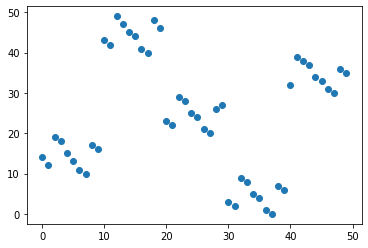

[135000] [100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144] [100046]


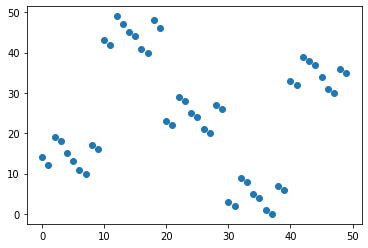

[140000] [100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144] [100046]


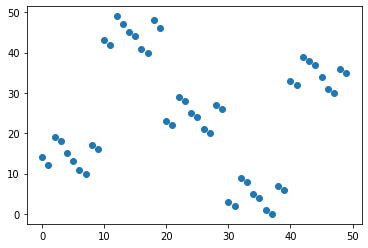

[145000] [100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144] [100046]


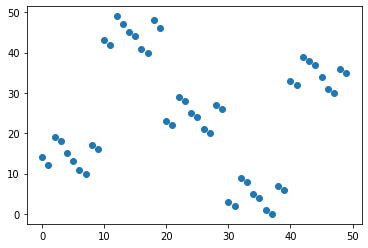

[150000] [100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144] [100046]


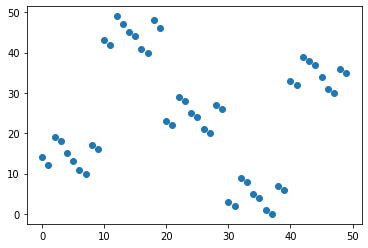

[155000] [100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144] [100120]


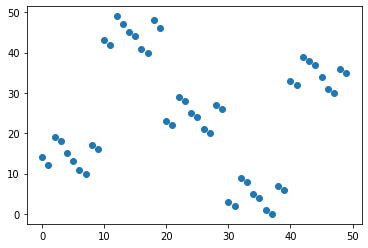

[160000] [100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144] [100128]


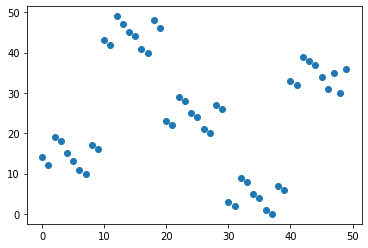

[165000] [100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144] [100128]


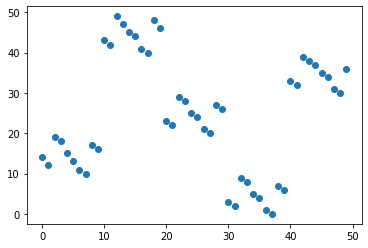

[170000] [100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144] [100130]


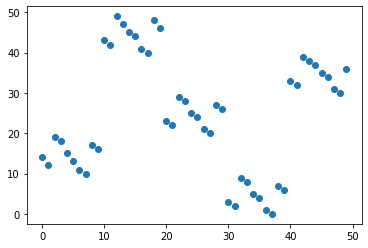

[175000] [100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144] [100136]


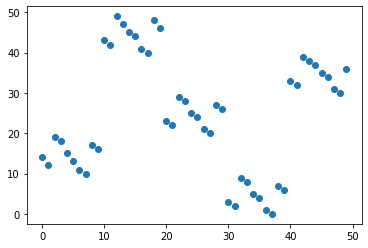

[180000] [100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144] [100136]


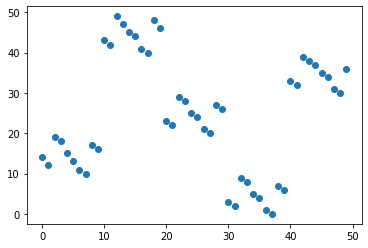

[185000] [100152, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144, 100144] [100136]


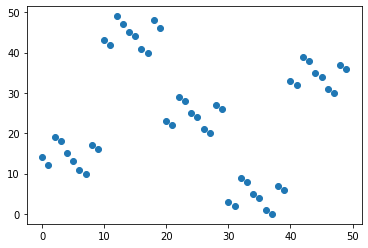

[190000] [100152, 100152, 100152, 100152, 100152, 100152, 100152, 100152, 100152, 100152] [100136]


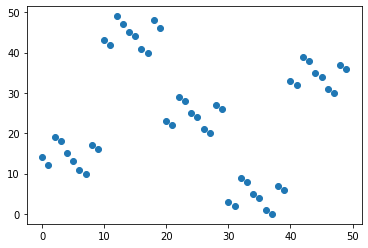

[195000] [100152, 100152, 100152, 100152, 100152, 100152, 100152, 100152, 100152, 100152] [100140]


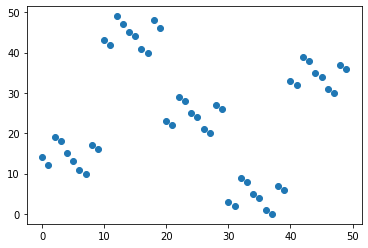

[200000] [100152, 100152, 100152, 100152, 100152, 100152, 100152, 100152, 100152, 100152] [100140]


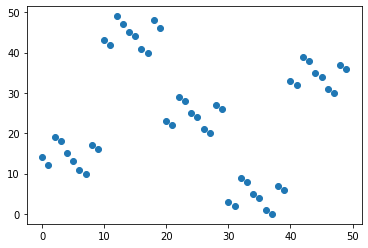

In [43]:
EA50_3 = Evolutionary_Algorithm2_25314_POP(50,EA50_2)

[5000] [4794388, 4774601, 4772805, 4766378, 4757351, 4726648, 4702606, 4696546, 4676053, 4666168] [2494454]


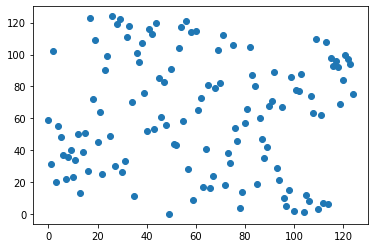

[10000] [6187881, 6137946, 6065774, 6061083, 6050834, 6045642, 6037608, 6033810, 6022582, 6020029] [4295556]


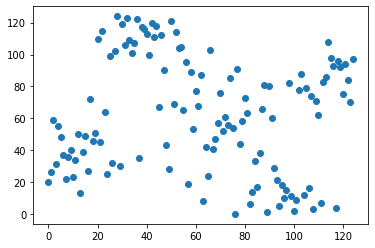

[15000] [7260795, 7220413, 7167005, 7160273, 7144109, 7135778, 7135041, 7130372, 7129555, 7123592] [5478250]


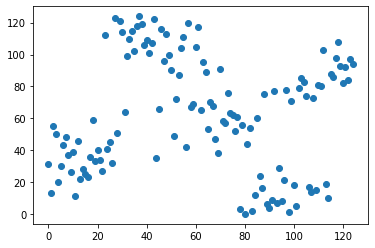

[20000] [7970686, 7967770, 7960500, 7953962, 7953513, 7953513, 7933245, 7925257, 7915898, 7908137] [6609778]


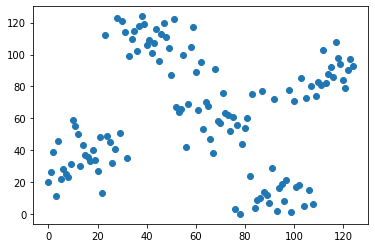

[25000] [8388430, 8348005, 8337474, 8323964, 8322610, 8320686, 8293550, 8279624, 8249850, 8249822] [7418140]


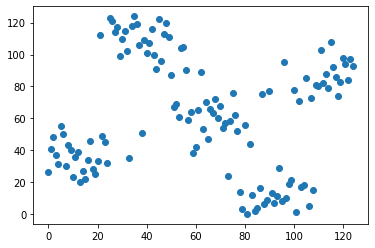

KeyboardInterrupt: 

In [46]:
EA125 = Evolutionary_Algorithm2_25314(125)